# EDA CREDIT ASSIGNMENT

## PROBLEM STATEMENT

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e., the variables which are strong indicators of defaulters. The company can utilize this knowledge or analysis for its portfolio and risk assessment.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank's decision:

1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.

2. If the applicant is not likely to repay the loan, i.e., applicant is likely to default, then approving the loan may lead to a    financial loss for the company.

## STEPS INVOLVED IN THE ANALYSIS

1. Understanding the data

2. Data Cleaning and Manipulation

3. Data Imputation

4. Finding Outliers

5. Data Analysis

6. Completion of Analysis!

In [1]:
# Importing the necessary libraries for analysis purposes

import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib.ticker as ticker, seaborn as sns

# Importing the warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the 'application_data' data set and storing it in a variable 'bank_application_data'
# Variable 'bank_application_data' is now a dataframe

bank_application_data = pd.read_csv('application_data.csv')

In [3]:
# Displaying the first five rows of the data set using head()

bank_application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Displaying the last five rows of the data set using tail()

bank_application_data.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [5]:
# Displaying the shape of the dataframe
# The dataframe has 307511 rows and 122 columns

bank_application_data.shape

(307511, 122)

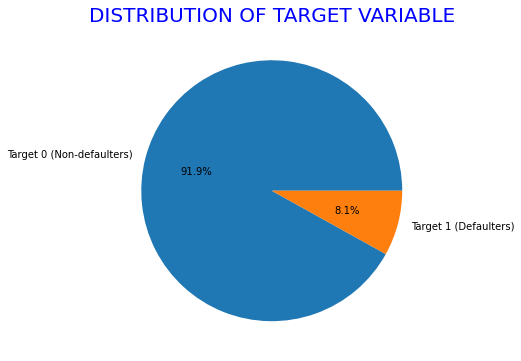

In [6]:
# The ratio of imbalance between Target 0 (Non-defaulters) and Target 1 (Defaulters)
# We can clearly see that non-defaulters are dominating the defaulters. 
# The ratio of imbalance = 91.9 / 8.1 = 11.35 : 1

plt.figure(figsize = [10, 6])
labels = ['Target 0 (Non-defaulters)', 'Target 1 (Defaulters)']
plt.pie(bank_application_data.TARGET.value_counts(normalize = True) * 100, autopct='%.1f%%', labels = labels)
plt.title('DISTRIBUTION OF TARGET VARIABLE', fontsize = 20, color = 'blue')
plt.show()

In [7]:
# Displaying the information of the dataframe
# As per the below info, there are 65 columns of float64 datatype, 41 columns of int64 datatype and 16 columns of object datatype.
# verbose = True is used to display the whole summary

bank_application_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [8]:
# From the below line of code, we can confirm that the int and float datatypes are a total of 106 (41 + 65) as the describe() 
# function performs statistics on only the numerical columns

bank_application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### Since there are a lot of columns in the data set, we'll drop the columns having null values more than 40% and impute values in the columns having null values less than 40%

In [9]:
# Checking the null values count for each column

bank_application_data.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [10]:
# Checking the null values percentage for each column

more_than_40_nulls = (bank_application_data.isna().sum() / len(bank_application_data)) * 100
more_than_40_nulls

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [11]:
# Checking which columns have null values percentage more than 40%
# There are 49 columns with null values more than 40%

more_than_40_nulls[more_than_40_nulls > 40]

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

In [12]:
# Since the above columns have null values more than 40%, it's better to drop them because they will not be useful 
# in the analysis

drop_list = more_than_40_nulls[more_than_40_nulls > 40].index.tolist()
bank_application_data = bank_application_data.drop(columns = drop_list, axis = 1)

In [13]:
# Displaying the first five rows of the dataframe
# We can see that the above columns with null values above 40% have been dropped. Total number of columns is 122-49 = 73

bank_application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Dropping unnecessary columns from the dataframe 'bank_application_data' because they are not playing much of a role in the
# analysis part and dropping them will not effect the analysis

bank_application_data = bank_application_data.drop(columns = ['NAME_TYPE_SUITE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
     'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
     'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
     'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
     'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
     'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
     'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
     'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
     'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'])

In [15]:
# Displaying the first five rows of the dataframe
# After the above unnecessary columns are dropped, there are 30 columns in the dataframe

bank_application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Laborers,1.0,2,WEDNESDAY,10,Business Entity Type 3,2.0,2.0,2.0,2.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Core staff,2.0,1,MONDAY,11,School,1.0,0.0,1.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Laborers,1.0,2,MONDAY,9,Government,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Laborers,2.0,2,WEDNESDAY,17,Business Entity Type 3,2.0,0.0,2.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Core staff,1.0,2,THURSDAY,11,Religion,0.0,0.0,0.0,0.0


In [16]:
# Checking the null values in the dataframe
# After dropping the above columns, each column now has null values below 40%

bank_application_data.isna().sum() / len(bank_application_data) * 100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
OCCUPATION_TYPE               31.345545
CNT_FAM_MEMBERS                0.000650
REGION_RATING_CLIENT           0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000


In [17]:
# Checking the data types of the columns (variables)

bank_application_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OCCUPATION_TYPE                object
CNT_FAM_MEMBERS               float64
REGION_RATING_CLIENT            int64
WEEKDAY_APPR_PROCESS_START     object
HOUR_APPR_PROCESS_START         int64
ORGANIZATION_TYPE              object
OBS_30_CNT_S

In [18]:
# Columns DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION and DAYS_ID_PUBLISH have negative values which is not correct 
# as they should have positive numbers

print(bank_application_data.DAYS_BIRTH)
print(bank_application_data.DAYS_EMPLOYED)
print(bank_application_data.DAYS_REGISTRATION)
print(bank_application_data.DAYS_ID_PUBLISH)

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64
0           -637
1          -1188
2           -225
3          -3039
4          -3038
           ...  
307506      -236
307507    365243
307508     -7921
307509     -4786
307510     -1262
Name: DAYS_EMPLOYED, Length: 307511, dtype: int64
0        -3648.0
1        -1186.0
2        -4260.0
3        -9833.0
4        -4311.0
           ...  
307506   -8456.0
307507   -4388.0
307508   -6737.0
307509   -2562.0
307510   -5128.0
Name: DAYS_REGISTRATION, Length: 307511, dtype: float64
0        -2120
1         -291
2        -2531
3        -2437
4        -3458
          ... 
307506   -1982
307507   -4090
307508   -5150
307509    -931
307510    -410
Name: DAYS_ID_PUBLISH, Length: 307511, dtype: int64


In [19]:
# Converting the negative values of columns DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION and DAYS_ID_PUBLISH to positive

bank_application_data.DAYS_BIRTH = bank_application_data.DAYS_BIRTH.abs()
bank_application_data.DAYS_EMPLOYED = bank_application_data.DAYS_EMPLOYED.abs()
bank_application_data.DAYS_REGISTRATION = bank_application_data.DAYS_REGISTRATION.abs()
bank_application_data.DAYS_ID_PUBLISH = bank_application_data.DAYS_ID_PUBLISH.abs()

In [20]:
# Calculating the age of the customer from DAYS_BIRTH column
# Creating a new column 'CUSTOMER_AGE'

bank_application_data['CUSTOMER_AGE'] = (bank_application_data.DAYS_BIRTH / 365).round(2)

In [21]:
# Displaying the first five rows of the dataframe
# A new column CUSTOMER_AGE has been created.

bank_application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,CUSTOMER_AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,1.0,2,WEDNESDAY,10,Business Entity Type 3,2.0,2.0,2.0,2.0,25.92
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,2.0,1,MONDAY,11,School,1.0,0.0,1.0,0.0,45.93
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,1.0,2,MONDAY,9,Government,0.0,0.0,0.0,0.0,52.18
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,2,WEDNESDAY,17,Business Entity Type 3,2.0,0.0,2.0,0.0,52.07
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,1.0,2,THURSDAY,11,Religion,0.0,0.0,0.0,0.0,54.61


In [22]:
# Grouping the column CUSTOMER_AGE using binning technique

bins = [0, 30, 40, 50, 60, 100]
labels = ['less than 30', '30 to 40', '40 to 50', '50 to 60', 'more than 60']

# Creating a new column AGE_GROUPS for age groups and displaying the first five rows of the dataframe
# A new column AGE_GROUPS has been created

bank_application_data['AGE_GROUPS'] = pd.cut(bank_application_data.CUSTOMER_AGE, bins = bins, labels = labels)
bank_application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,CUSTOMER_AGE,AGE_GROUPS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2,WEDNESDAY,10,Business Entity Type 3,2.0,2.0,2.0,2.0,25.92,less than 30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1,MONDAY,11,School,1.0,0.0,1.0,0.0,45.93,40 to 50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,2,MONDAY,9,Government,0.0,0.0,0.0,0.0,52.18,50 to 60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2,WEDNESDAY,17,Business Entity Type 3,2.0,0.0,2.0,0.0,52.07,50 to 60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,2,THURSDAY,11,Religion,0.0,0.0,0.0,0.0,54.61,50 to 60


In [23]:
# Since we've created age groups, we can drop CUSTOMER_AGE column
# Displaying the first five rows of the dataframe. We can see that CUSTOMER_AGE column has been dropped

bank_application_data = bank_application_data.drop(columns = 'CUSTOMER_AGE')
bank_application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AGE_GROUPS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,1.0,2,WEDNESDAY,10,Business Entity Type 3,2.0,2.0,2.0,2.0,less than 30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,2.0,1,MONDAY,11,School,1.0,0.0,1.0,0.0,40 to 50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,1.0,2,MONDAY,9,Government,0.0,0.0,0.0,0.0,50 to 60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,2,WEDNESDAY,17,Business Entity Type 3,2.0,0.0,2.0,0.0,50 to 60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,1.0,2,THURSDAY,11,Religion,0.0,0.0,0.0,0.0,50 to 60


In [24]:
# Creating a range for AMT_INCOME_TOTAL column using binning technique

bins = [0, 100000, 200000, 300000, 400000, 500000, 100000000000000000]
labels = ['less than 100K', '100K to 200K', '200K to 300K', '300K to 400K', '400K to 500K', 'more than 500K']

# Creating a new column INCOME_RANGE for income range and displaying the first five rows of the dataframe
# A new column INCOME_RANGE has been created

bank_application_data['INCOME_RANGE'] = pd.cut(bank_application_data.AMT_INCOME_TOTAL, bins = bins, labels = labels)
bank_application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AGE_GROUPS,INCOME_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2,WEDNESDAY,10,Business Entity Type 3,2.0,2.0,2.0,2.0,less than 30,200K to 300K
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1,MONDAY,11,School,1.0,0.0,1.0,0.0,40 to 50,200K to 300K
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,2,MONDAY,9,Government,0.0,0.0,0.0,0.0,50 to 60,less than 100K
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2,WEDNESDAY,17,Business Entity Type 3,2.0,0.0,2.0,0.0,50 to 60,100K to 200K
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,2,THURSDAY,11,Religion,0.0,0.0,0.0,0.0,50 to 60,100K to 200K


In [25]:
# Creating a range for AMT_CREDIT column using binning technique

bins = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 1000000000]
labels = ['less than 100K', '100K to 200K', '200K to 300K', '300K to 400K', '400K to 500K', '500K to 600K', '600K to 700K', 
          '700K to 800K', '800K to 900K', '900K to 1M', 'more than 1M']

# Creating a new column AMT_CREDIT_RANGE for amount credit range and displaying the first five rows of the dataframe
# A new column AMT_CREDIT_RANGE has been created

bank_application_data['AMT_CREDIT_RANGE'] = pd.cut(bank_application_data['AMT_CREDIT'], bins = bins, labels = labels)
bank_application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AGE_GROUPS,INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,WEDNESDAY,10,Business Entity Type 3,2.0,2.0,2.0,2.0,less than 30,200K to 300K,400K to 500K
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,MONDAY,11,School,1.0,0.0,1.0,0.0,40 to 50,200K to 300K,more than 1M
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,MONDAY,9,Government,0.0,0.0,0.0,0.0,50 to 60,less than 100K,100K to 200K
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,WEDNESDAY,17,Business Entity Type 3,2.0,0.0,2.0,0.0,50 to 60,100K to 200K,300K to 400K
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,THURSDAY,11,Religion,0.0,0.0,0.0,0.0,50 to 60,100K to 200K,500K to 600K


In [26]:
# Checking for count of null values (greater than 0) in each column

count_of_null_values = bank_application_data.isna().sum()
count_of_null_values[count_of_null_values > 0]

AMT_ANNUITY                    12
AMT_GOODS_PRICE               278
OCCUPATION_TYPE             96391
CNT_FAM_MEMBERS                 2
OBS_30_CNT_SOCIAL_CIRCLE     1021
DEF_30_CNT_SOCIAL_CIRCLE     1021
OBS_60_CNT_SOCIAL_CIRCLE     1021
DEF_60_CNT_SOCIAL_CIRCLE     1021
dtype: int64

In [27]:
# Checking for columns having null values more than 0% and less than 40%

null_values = (bank_application_data.isna().sum() / len(bank_application_data)) * 100
nulls_more_than_0_less_than_40 = null_values[null_values > 0]
nulls_more_than_0_less_than_40

AMT_ANNUITY                  0.003902
AMT_GOODS_PRICE              0.090403
OCCUPATION_TYPE             31.345545
CNT_FAM_MEMBERS              0.000650
OBS_30_CNT_SOCIAL_CIRCLE     0.332021
DEF_30_CNT_SOCIAL_CIRCLE     0.332021
OBS_60_CNT_SOCIAL_CIRCLE     0.332021
DEF_60_CNT_SOCIAL_CIRCLE     0.332021
dtype: float64

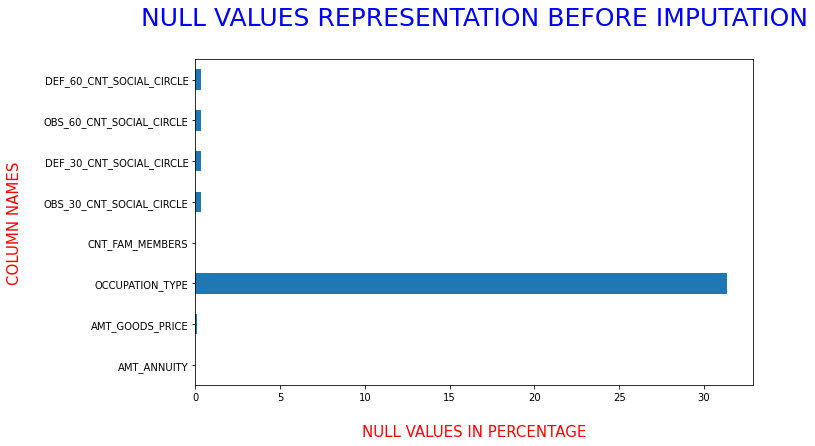

In [28]:
# Null values representation before imputing them
# From the below horizontal barplot, we can observe that OCCUPATION_TYPE is having the highest percentage of null values         

plt.figure(figsize = [10, 6])
nulls_more_than_0_less_than_40[nulls_more_than_0_less_than_40 > 0].plot.barh()
plt.title('NULL VALUES REPRESENTATION BEFORE IMPUTATION\n', fontsize = 25, color = 'Blue')
plt.xlabel('\nNULL VALUES IN PERCENTAGE', fontsize = 15, color = 'red')
plt.ylabel('COLUMN NAMES\n', fontsize = 15, color = 'red')
plt.show()

In [29]:
# CODE_GENDER column has 4 'XNA' values

bank_application_data.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [30]:
# NAME_FAMILY_STATUS column has 4 'Unknown' values

bank_application_data.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [31]:
# ORGANIZATION_TYPE column has 55374 'XNA' values

bank_application_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

## OVERALL NULL / INVALID VALUES

**CODE_GENDER** column has 4 'XNA' values

**NAME_FAMILY_STATUS** column has 2 'Unknown' values

**ORGANIZATION_TYPE** column has 55374 'XNA' values

**AMT_ANNUITY** column has 12 null values

**AMT_GOODS_PRICE** column has 278 null values

**OCCUPATION_TYPE** column has 96391 null values

**CNT_FAM_MEMBERS** column has 2 null values

**OBS_30_CNT_SOCIAL_CIRCLE** column has 1021 null values

**DEF_30_CNT_SOCIAL_CIRCLE** column has 1021 null values

**OBS_60_CNT_SOCIAL_CIRCLE** column has 1021 null values

**DEF_60_CNT_SOCIAL_CIRCLE** column has 1021 null values

## IMPUTING THE NULL / MISSING VALUES

#### Imputing the 'XNA' values in CODE_GENDER column

In [32]:
# Imputing 4 'XNA' values in CODE_GENDER column

code_gender_mode = bank_application_data.CODE_GENDER.mode()[0]
code_gender_mode

'F'

In [33]:
# Since 'F' (Female) is occurring most number of times (mode), we can impute the 'XNA' values with 'F'
# lambda function will check wherever there is an 'XNA' value and replace it with an 'F'. If it's not an 'XNA', original value
# is retained. We can see that the count of 'F' has increased by 4

bank_application_data.CODE_GENDER = bank_application_data.CODE_GENDER.apply(lambda x : code_gender_mode if x == 'XNA' else x)
bank_application_data.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

#### Imputing the 'Unknown' values in NAME_FAMILY_STATUS column

In [34]:
# Imputing 2 'Unknown' values in NAME_FAMILY_STATUS column

name_family_status_mode = bank_application_data.NAME_FAMILY_STATUS.mode()[0]
name_family_status_mode

'Married'

In [35]:
# Since 'Married' is occurring most number of times (mode), we can impute the 'Unknown' values with 'Married'
# We can see that the count of 'Married' has increased by 2

bank_application_data.NAME_FAMILY_STATUS = bank_application_data.NAME_FAMILY_STATUS.apply(lambda x : name_family_status_mode if x == 'Unknown' else x)
bank_application_data.NAME_FAMILY_STATUS.value_counts()

Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64

#### Imputing the 'XNA' values in ORGANIZATION_TYPE column

In [36]:
# Imputing 55374 'XNA' values in ORGANIZATION_TYPE column

organization_type_mode = bank_application_data.ORGANIZATION_TYPE.mode()[0]
organization_type_mode

'Business Entity Type 3'

In [37]:
# Since 'Business Entity Type 3' is occurring most number of times (mode), we can impute the 'XNA' values with 'Business Entity Type 3'
# We can see that the count of 'Business Entity Type 3' has increased by 55374

bank_application_data.ORGANIZATION_TYPE = bank_application_data.ORGANIZATION_TYPE.apply(lambda x : organization_type_mode if x == 'XNA' else x)
bank_application_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    123366
Self-employed              38412
Other                      16683
Medicine                   11193
Business Entity Type 2     10553
Government                 10404
School                      8893
Trade: type 7               7831
Kindergarten                6880
Construction                6721
Business Entity Type 1      5984
Transport: type 4           5398
Trade: type 3               3492
Industry: type 9            3368
Industry: type 3            3278
Security                    3247
Housing                     2958
Industry: type 11           2704
Military                    2634
Bank                        2507
Agriculture                 2454
Police                      2341
Transport: type 2           2204
Postal                      2157
Security Ministries         1974
Trade: type 2               1900
Restaurant                  1811
Services                    1575
University                  1327
Industry: type 7            1307
Transport:

#### Imputing the null values in AMT_ANNUITY column

In [38]:
# Imputing the null values in AMT_ANNUITY column with median as median is uneffected by outliers

bank_application_data.AMT_ANNUITY = bank_application_data.AMT_ANNUITY.fillna(bank_application_data.AMT_ANNUITY.median())

In [39]:
# Confirming the null value count in AMT_ANNUITY column

bank_application_data.AMT_ANNUITY.isna().sum()

0

#### Imputing the null values in AMT_GOODS_PRICE column

In [40]:
# Imputing the null values in AMT_GOODS_PRICE column with median

bank_application_data.AMT_GOODS_PRICE = bank_application_data.AMT_GOODS_PRICE.fillna(bank_application_data.AMT_GOODS_PRICE.median())

In [41]:
# Confirming the null value count in AMT_GOODS_PRICE column

bank_application_data.AMT_GOODS_PRICE.isna().sum()

0

#### Imputing the null values in OCCUPATION_TYPE column

In [42]:
# Imputing 96391 null values in OCCUPATION_TYPE column

occupation_type_mode = bank_application_data.OCCUPATION_TYPE.mode()[0]
occupation_type_mode

'Laborers'

In [43]:
# Since 'Laborers' is occurring most number of times (mode), we can impute the null values with 'Laborers'
# We can see that the count of 'Laborers' has increased by 96391

bank_application_data.OCCUPATION_TYPE = bank_application_data.OCCUPATION_TYPE.fillna(occupation_type_mode)
bank_application_data.OCCUPATION_TYPE.value_counts()

Laborers                 151577
Sales staff               32102
Core staff                27570
Managers                  21371
Drivers                   18603
High skill tech staff     11380
Accountants                9813
Medicine staff             8537
Security staff             6721
Cooking staff              5946
Cleaning staff             4653
Private service staff      2652
Low-skill Laborers         2093
Waiters/barmen staff       1348
Secretaries                1305
Realty agents               751
HR staff                    563
IT staff                    526
Name: OCCUPATION_TYPE, dtype: int64

#### Imputing the null values in CNT_FAM_MEMBERS column

In [44]:
# Imputing 2 null values in CNT_FAM_MEMBERS column with median

bank_application_data.CNT_FAM_MEMBERS = bank_application_data.CNT_FAM_MEMBERS.fillna(bank_application_data.CNT_FAM_MEMBERS.median())

In [45]:
# Confirming the null value count in CNT_FAM_MEMBERS column

bank_application_data.CNT_FAM_MEMBERS.isna().sum()

0

#### Imputing the null values in OBS_30_CNT_SOCIAL_CIRCLE column

In [46]:
# Imputing 1021 null values in OBS_30_CNT_SOCIAL_CIRCLE column with median

bank_application_data.OBS_30_CNT_SOCIAL_CIRCLE = bank_application_data.OBS_30_CNT_SOCIAL_CIRCLE.fillna(bank_application_data.OBS_30_CNT_SOCIAL_CIRCLE.median())

In [47]:
# Confirming the null value count in CNT_FAM_MEMBERS column

bank_application_data.OBS_30_CNT_SOCIAL_CIRCLE.isna().sum()

0

#### Imputing the null values in DEF_30_CNT_SOCIAL_CIRCLE column

In [48]:
# Imputing 1021 null values in DEF_30_CNT_SOCIAL_CIRCLE column with median

bank_application_data.DEF_30_CNT_SOCIAL_CIRCLE = bank_application_data.DEF_30_CNT_SOCIAL_CIRCLE.fillna(bank_application_data.DEF_30_CNT_SOCIAL_CIRCLE.median())

In [49]:
# Confirming the null value count in DEF_30_CNT_SOCIAL_CIRCLE column

bank_application_data.DEF_30_CNT_SOCIAL_CIRCLE.isna().sum()

0

#### Imputing the null values in OBS_60_CNT_SOCIAL_CIRCLE column

In [50]:
# Imputing 1021 null values in OBS_60_CNT_SOCIAL_CIRCLE column with median

bank_application_data.OBS_60_CNT_SOCIAL_CIRCLE = bank_application_data.OBS_60_CNT_SOCIAL_CIRCLE.fillna(bank_application_data.OBS_60_CNT_SOCIAL_CIRCLE.median())

In [51]:
# Confirming the null value count in OBS_60_CNT_SOCIAL_CIRCLE column

bank_application_data.OBS_60_CNT_SOCIAL_CIRCLE.isna().sum()

0

#### Imputing the null values in DEF_60_CNT_SOCIAL_CIRCLE  column

In [52]:
# Imputing 1021 null values in DEF_60_CNT_SOCIAL_CIRCLE column with median

bank_application_data.DEF_60_CNT_SOCIAL_CIRCLE = bank_application_data.DEF_60_CNT_SOCIAL_CIRCLE.fillna(bank_application_data.DEF_60_CNT_SOCIAL_CIRCLE.median())

In [53]:
# Confirming the null value count in DEF_60_CNT_SOCIAL_CIRCLE column

bank_application_data.DEF_60_CNT_SOCIAL_CIRCLE.isna().sum()

0

In [54]:
# Verifying that all the columns have no null values

bank_application_data.isna().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               0
REGION_RATING_CLIENT          0
WEEKDAY_APPR_PROCESS_START    0
HOUR_APPR_PROCESS_START       0
ORGANIZATION_TYPE             0
OBS_30_CNT_SOCIAL_CIRCLE      0
DEF_30_CNT_SOCIAL_CIRCLE      0
OBS_60_CNT_SOCIAL_CIRCLE      0
DEF_60_CNT_SOCIAL_CIRCLE      0
AGE_GROUPS                    0
INCOME_R

## CHECKING FOR OUTLIERS

In [55]:
# Adding only int64 and float64 datatype columns to a list for checking outliers

bank_application_data.select_dtypes(include = ['int64', 'float64']).columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'HOUR_APPR_PROCESS_START',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

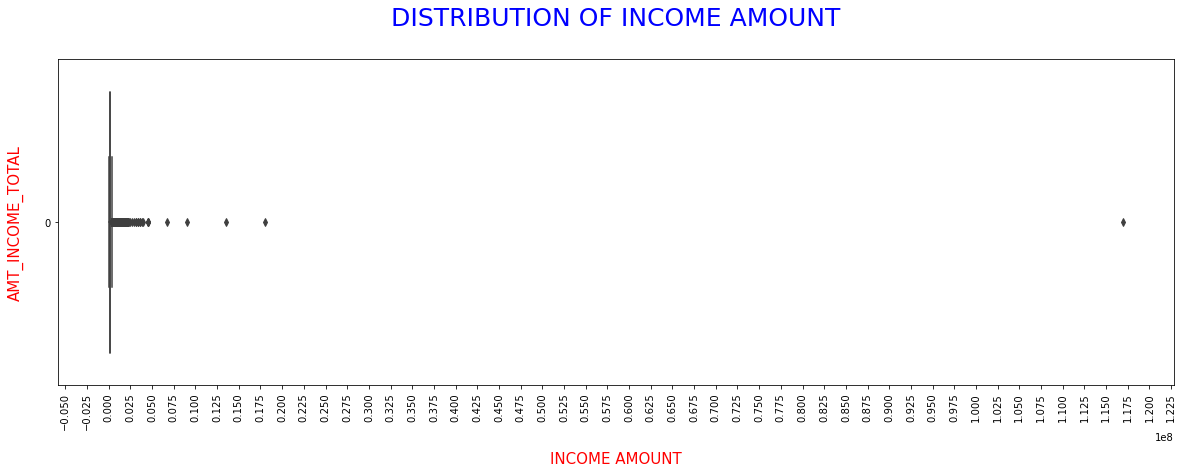

In [56]:
# Checking outliers in AMT_INCOME_TOTAL column
# From the below boxplot, it's clear that there are outliers in AMT_INCOME_TOTAL column. The maximum income in the column is
# 1.17 X (10 ^ 8) which is really a high value but income differs from person to person.
# By importing the ticker sub-module we can customize the axis values

plt.figure(figsize = [20, 6])
x = sns.boxplot(data = bank_application_data.AMT_INCOME_TOTAL, orient = 'h')
x.xaxis.set_major_locator(ticker.MultipleLocator(2500000))
plt.title('DISTRIBUTION OF INCOME AMOUNT\n', fontsize = 25, color = 'Blue')
plt.xlabel('\nINCOME AMOUNT', fontsize = 15, color = 'red')
plt.ylabel('AMT_INCOME_TOTAL\n', fontsize = 15, color = 'red')
plt.xticks(rotation = 90)
plt.show()

In [57]:
# Describing AMT_INCOME_TOTAL column

bank_application_data.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

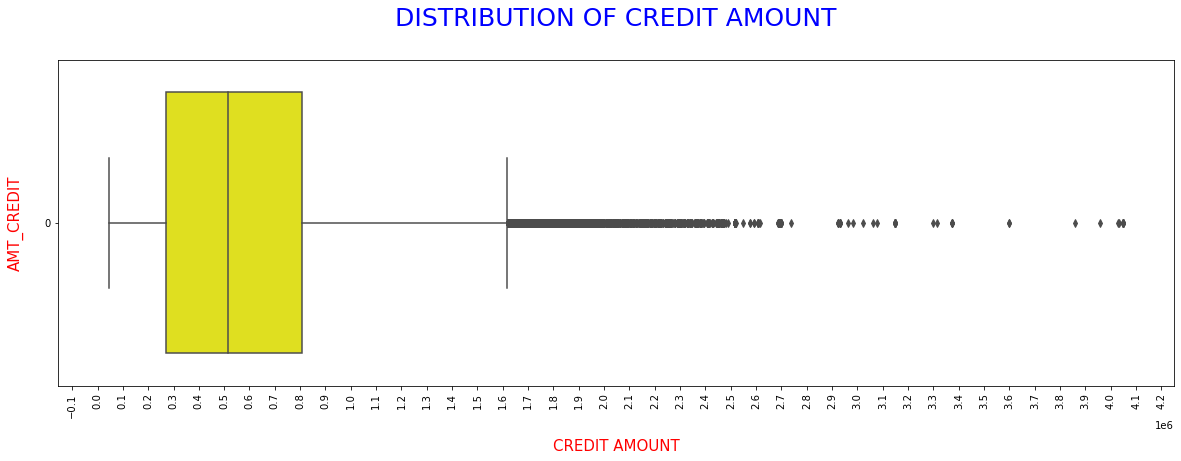

In [58]:
# Checking outliers in AMT_CREDIT column
# From the below boxplot, it's clear that there are outliers in AMT_CREDIT column. The maximum credit amount in the column is
# 4.05 X (10 ^ 6)

plt.figure(figsize = [20, 6])
x = sns.boxplot(data = bank_application_data.AMT_CREDIT, color = 'yellow', orient = 'h')
x.xaxis.set_major_locator(ticker.MultipleLocator(100000))
plt.title('DISTRIBUTION OF CREDIT AMOUNT\n', fontsize = 25, color = 'Blue')
plt.xlabel('\nCREDIT AMOUNT', fontsize = 15, color = 'red')
plt.ylabel('AMT_CREDIT\n', fontsize = 15, color = 'red')
plt.xticks(rotation = 90)
plt.show()

In [59]:
# Describing AMT_CREDIT column

bank_application_data.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

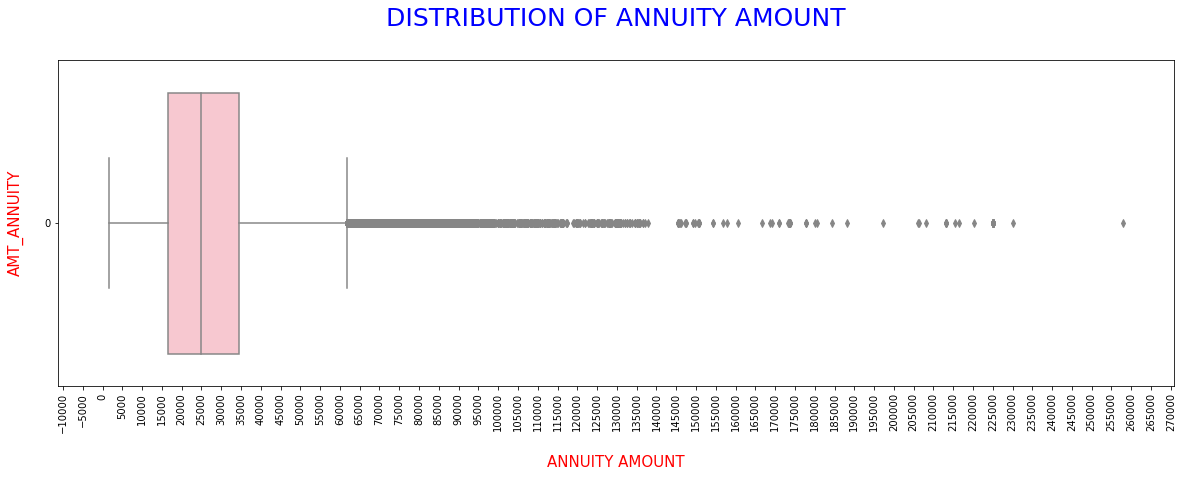

In [60]:
# Checking outliers in AMT_ANNUITY column
# From the below boxplot, it's clear that there are outliers in AMT_ANNUITY column. The maximum annuity amount in the column is
# 258025.5

plt.figure(figsize = [20, 6])
x = sns.boxplot(data = bank_application_data.AMT_ANNUITY, color = 'pink', orient = 'h')
x.xaxis.set_major_locator(ticker.MultipleLocator(5000))
plt.title('DISTRIBUTION OF ANNUITY AMOUNT\n', fontsize = 25, color = 'Blue')
plt.xlabel('\nANNUITY AMOUNT', fontsize = 15, color = 'red')
plt.ylabel('AMT_ANNUITY\n', fontsize = 15, color = 'red')
plt.xticks(rotation = 90)
plt.show()

In [61]:
# Describing AMT_ANNUITY column

bank_application_data.AMT_ANNUITY.describe()

count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

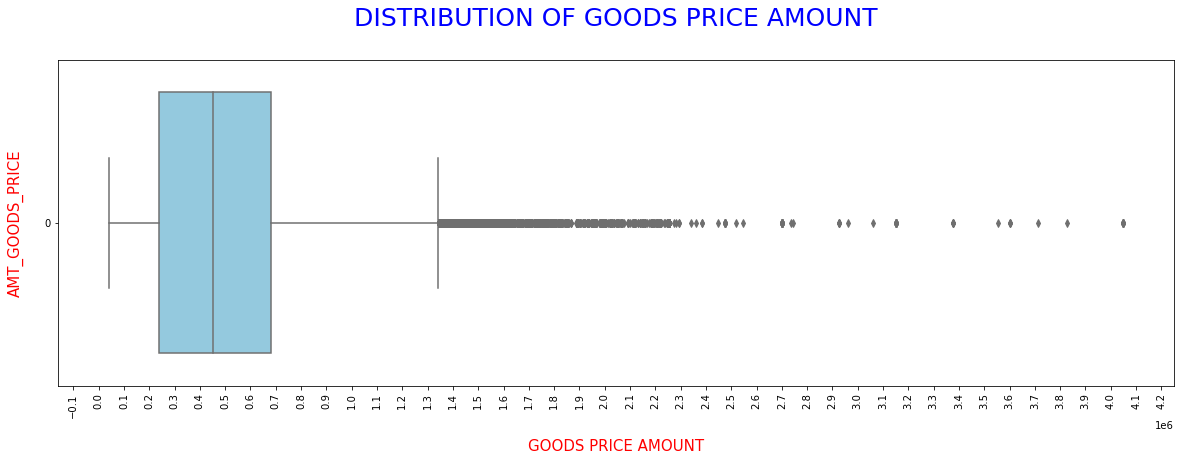

In [62]:
# Checking outliers in AMT_GOODS_PRICE column
# From the below boxplot, it's clear that there are outliers in AMT_GOODS_PRICE column. The maximum goods price amount 
# in the column is 4.05 X (10 ^ 6) but price varies from product to product 

plt.figure(figsize = [20, 6])
x = sns.boxplot(data = bank_application_data.AMT_GOODS_PRICE, color = 'skyblue', orient = 'h')
x.xaxis.set_major_locator(ticker.MultipleLocator(100000))
plt.title('DISTRIBUTION OF GOODS PRICE AMOUNT\n', fontsize = 25, color = 'Blue')
plt.xlabel('\nGOODS PRICE AMOUNT', fontsize = 15, color = 'red')
plt.ylabel('AMT_GOODS_PRICE\n', fontsize = 15, color = 'red')
plt.xticks(rotation = 90)
plt.show()

In [63]:
# Describing AMT_GOODS_PRICE column

bank_application_data.AMT_GOODS_PRICE.describe()

count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

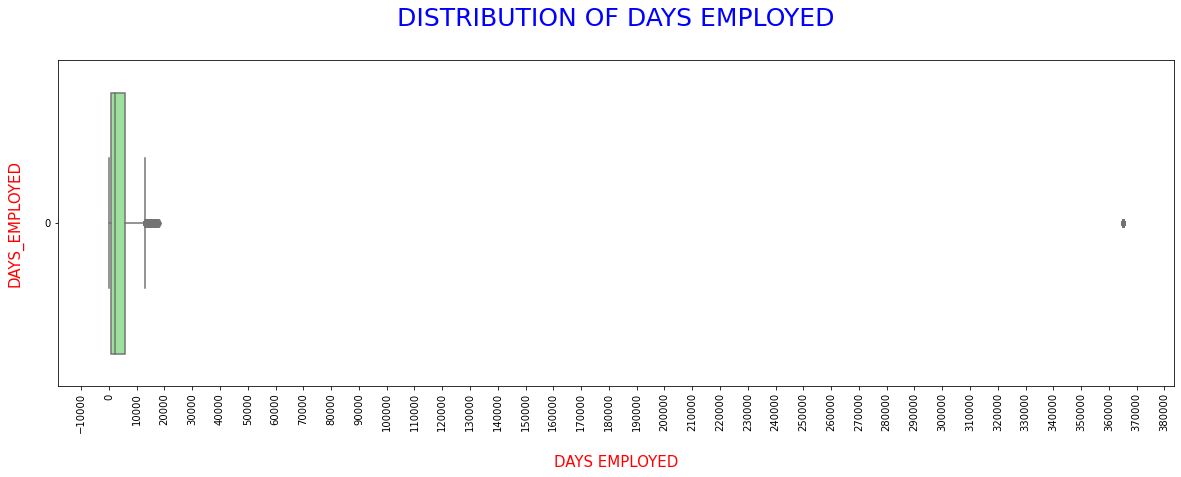

In [64]:
# Checking outliers in DAYS_EMPLOYED column
# From the below boxplot, it's clear that there is an outlier in DAYS_EMPLOYED column. The maximum days employed
# in the column is 365243.0

plt.figure(figsize = [20, 6])
x = sns.boxplot(data = bank_application_data.DAYS_EMPLOYED, color = 'lightgreen', orient = 'h')
x.xaxis.set_major_locator(ticker.MultipleLocator(10000))
plt.title('DISTRIBUTION OF DAYS EMPLOYED\n', fontsize = 25, color = 'Blue')
plt.xlabel('\nDAYS EMPLOYED', fontsize = 15, color = 'red')
plt.ylabel('DAYS_EMPLOYED\n', fontsize = 15, color = 'red')
plt.xticks(rotation = 90)
plt.show()

In [65]:
bank_application_data.DAYS_EMPLOYED.describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [66]:
# We need to convert the maximum of days employed into years to identify if the value is truly an outlier or not
# It's clear from the result that it's an outlier as the client cannot start current employment 1000 years before the application
# Is not practical and not possible

bank_application_data.DAYS_EMPLOYED.max() / 365

1000.6657534246575

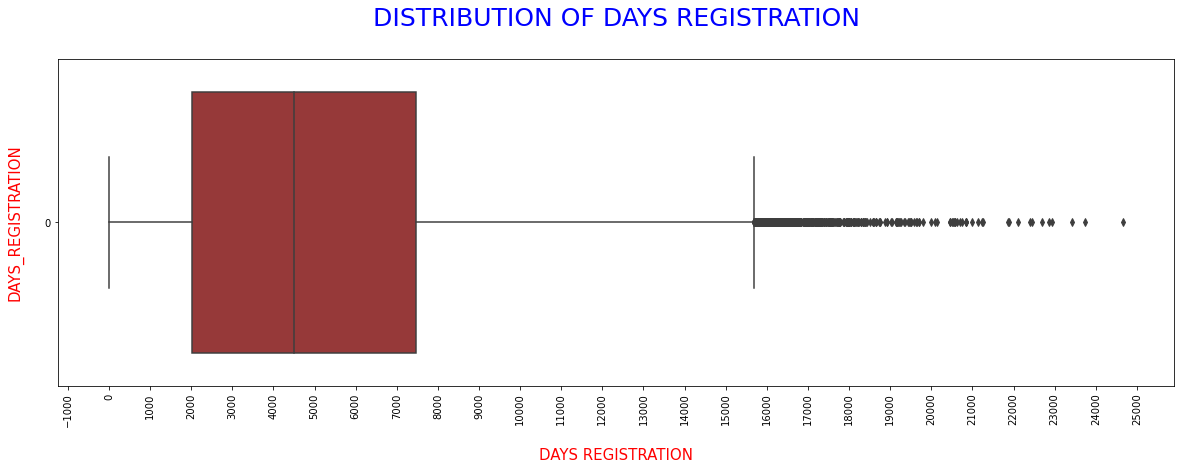

In [67]:
# Checking outliers in DAYS_REGISTRATION column
# From the below boxplot, it's clear that there are outliers in DAYS_REGISTRATION column. The maximum days registration
# in the column is 24672.0

plt.figure(figsize = [20, 6])
x = sns.boxplot(data = bank_application_data.DAYS_REGISTRATION, color = 'brown', orient = 'h')
x.xaxis.set_major_locator(ticker.MultipleLocator(1000))
plt.title('DISTRIBUTION OF DAYS REGISTRATION\n', fontsize = 25, color = 'Blue')
plt.xlabel('\nDAYS REGISTRATION', fontsize = 15, color = 'red')
plt.ylabel('DAYS_REGISTRATION\n', fontsize = 15, color = 'red')
plt.xticks(rotation = 90)
plt.show()

In [68]:
bank_application_data.DAYS_REGISTRATION.describe()

count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64

In [69]:
# We need to convert the maximum of days registration into years to identify if the value is truly an outlier or not
# It's clear from the result that it's an outlier as the client cannot change his registration 67 years before the application
# It does not seem practical

bank_application_data.DAYS_REGISTRATION.max() / 365

67.59452054794521

## DIVIDING THE DATA SET INTO TWO DIFFERENT DATAFRAMES:

1. TARGET 0 (Non-defaulter)
2. TARGET 1 (Defaulters)

In [70]:
target_0 = bank_application_data[bank_application_data.TARGET == 0]
target_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AGE_GROUPS,INCOME_RANGE,AMT_CREDIT_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,MONDAY,11,School,1.0,0.0,1.0,0.0,40 to 50,200K to 300K,more than 1M
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,MONDAY,9,Government,0.0,0.0,0.0,0.0,50 to 60,less than 100K,100K to 200K
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,WEDNESDAY,17,Business Entity Type 3,2.0,0.0,2.0,0.0,50 to 60,100K to 200K,300K to 400K
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,THURSDAY,11,Religion,0.0,0.0,0.0,0.0,50 to 60,100K to 200K,500K to 600K
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,WEDNESDAY,16,Other,0.0,0.0,0.0,0.0,40 to 50,less than 100K,400K to 500K


In [71]:
target_1 = bank_application_data[bank_application_data.TARGET == 1]
target_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AGE_GROUPS,INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,WEDNESDAY,10,Business Entity Type 3,2.0,2.0,2.0,2.0,less than 30,200K to 300K,400K to 500K
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,MONDAY,9,Business Entity Type 3,10.0,1.0,10.0,0.0,50 to 60,100K to 200K,900K to 1M
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,TUESDAY,9,Business Entity Type 3,0.0,0.0,0.0,0.0,40 to 50,200K to 300K,more than 1M
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,THURSDAY,11,Self-employed,1.0,0.0,1.0,0.0,30 to 40,100K to 200K,200K to 300K
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,THURSDAY,10,Business Entity Type 3,1.0,1.0,1.0,1.0,more than 60,less than 100K,200K to 300K


## UNIVARIATE ANALYSIS

#### We will perform the below univariate analysis on both target_0 and target_1

1. Categorical Unordered Univariate Analysis
2. Categorical Ordered Univariate Analysis
3. Numerical - Categorical Univariate Analysis

### 1. Categorical Unordered Univariate Analysis

**Categorical Unordered Columns**

NAME_CONTRACT_TYPE

CODE_GENDER

NAME_INCOME_TYPE

NAME_FAMILY_STATUS

NAME_HOUSING_TYPE

OCCUPATION_TYPE

#### A. Univariate analysis for NAME_CONTRACT_TYPE column

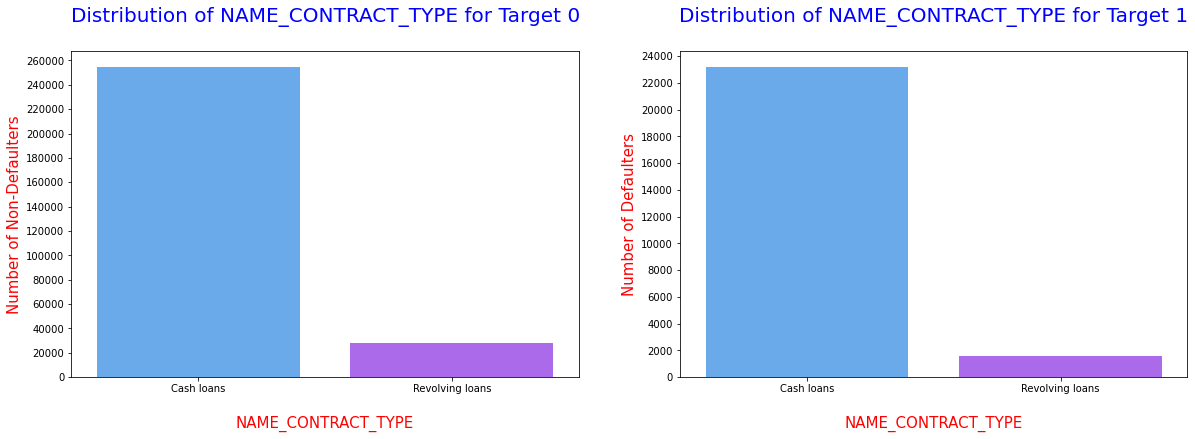

In [72]:
plt.figure(figsize = [20, 6])
plt.subplot(1, 2, 1)
y1 = sns.countplot(data = target_0, x = 'NAME_CONTRACT_TYPE', palette = 'cool')
y1.yaxis.set_major_locator(ticker.MultipleLocator(20000))
plt.title('Distribution of NAME_CONTRACT_TYPE for Target 0\n', fontsize = 20, color = 'blue')
plt.xlabel('\nNAME_CONTRACT_TYPE', fontsize = 15, color = 'red')
plt.ylabel('Number of Non-Defaulters', fontsize = 15, color = 'red')
plt.subplot(1, 2, 2)
y2 = sns.countplot(data = target_1, x = 'NAME_CONTRACT_TYPE', palette = 'cool')
y2.yaxis.set_major_locator(ticker.MultipleLocator(2000))
plt.title('Distribution of NAME_CONTRACT_TYPE for Target 1\n', fontsize = 20, color = 'blue')
plt.xlabel('\nNAME_CONTRACT_TYPE', fontsize = 15, color = 'red')
plt.ylabel('Number of Defaulters', fontsize = 15, color = 'red')
plt.show()

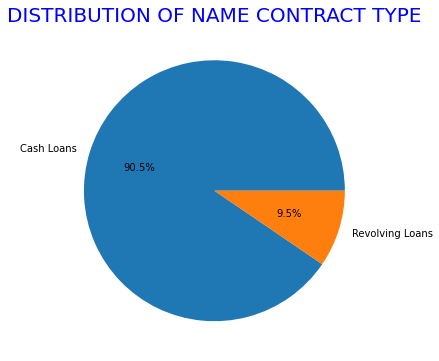

In [73]:
plt.figure(figsize = [10, 6])
labels = ['Cash Loans', 'Revolving Loans']
plt.pie(bank_application_data.NAME_CONTRACT_TYPE.value_counts(normalize = True) * 100, autopct='%.1f%%', labels = labels)
plt.title('DISTRIBUTION OF NAME CONTRACT TYPE', fontsize = 20, color = 'blue')
plt.show()

**INFERENCES**

1. From the above graphs, we can infer that cash loans are dominating.
2. Revolving loans have less number of defaulters.
3. Cash Loans constitute of 90.5% of the loans.
4. Banks should consider giving revolving loans.

#### B. Univariate analysis for CODE_GENDER column

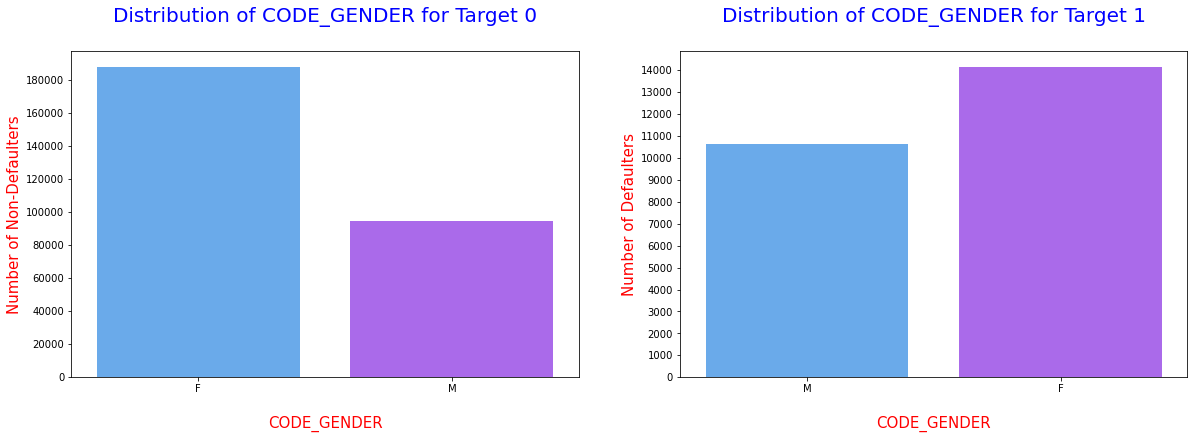

In [74]:
plt.figure(figsize = [20, 6])
plt.subplot(1, 2, 1)
y1 = sns.countplot(data = target_0, x = 'CODE_GENDER', palette = 'cool')
y1.yaxis.set_major_locator(ticker.MultipleLocator(20000))
plt.title('Distribution of CODE_GENDER for Target 0\n', fontsize = 20, color = 'blue')
plt.xlabel('\nCODE_GENDER', fontsize = 15, color = 'red')
plt.ylabel('Number of Non-Defaulters', fontsize = 15, color = 'red')
plt.subplot(1, 2, 2)
y2 = sns.countplot(data = target_1, x = 'CODE_GENDER', palette = 'cool')
y2.yaxis.set_major_locator(ticker.MultipleLocator(1000))
plt.title('Distribution of CODE_GENDER for Target 1\n', fontsize = 20, color = 'blue')
plt.xlabel('\nCODE_GENDER', fontsize = 15, color = 'red')
plt.ylabel('Number of Defaulters', fontsize = 15, color = 'red')
plt.show()

**INFERENCES**

1. From the above graphs, we can infer that most loan applicants are females.
2. Females mostly tend to pay the loans with respect to the total number of applications in both males and females.
3. Bank should have a higher acceptance rate for loans for females.

#### C. Univariate analysis for NAME_INCOME_TYPE column

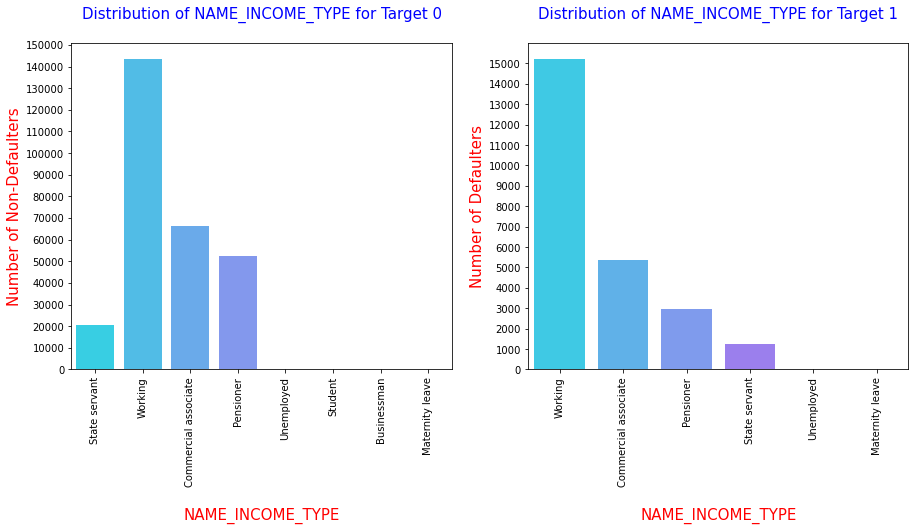

In [75]:
plt.figure(figsize = [15, 6])
plt.subplot(1, 2, 1)
y1 = sns.countplot(data = target_0, x = 'NAME_INCOME_TYPE', palette = 'cool')
y1.yaxis.set_major_locator(ticker.MultipleLocator(10000))
plt.title('Distribution of NAME_INCOME_TYPE for Target 0\n', fontsize = 15, color = 'blue')
plt.xlabel('\nNAME_INCOME_TYPE', fontsize = 15, color = 'red')
plt.ylabel('Number of Non-Defaulters', fontsize = 15, color = 'red')
plt.xticks(rotation = 90)
plt.subplot(1, 2, 2)
y2 = sns.countplot(data = target_1, x = 'NAME_INCOME_TYPE', palette = 'cool')
y2.yaxis.set_major_locator(ticker.MultipleLocator(1000))
plt.title('Distribution of NAME_INCOME_TYPE for Target 1\n', fontsize = 15, color = 'blue')
plt.xlabel('\nNAME_INCOME_TYPE', fontsize = 15, color = 'red')
plt.ylabel('Number of Defaulters', fontsize = 15, color = 'red')
plt.xticks(rotation = 90)
plt.show()

**INFERENCES**  

1. From the above graphs, we can infer that working professionals are leading the number of loan applications.
2. Maximum working professionals tend to pay the loans on time as they have regular income.
3. The second highest defaulters are Commercial associates.
4. Banks should consider giving more loans to working professionals.

#### D. Univariate analysis for NAME_FAMILY_STATUS column

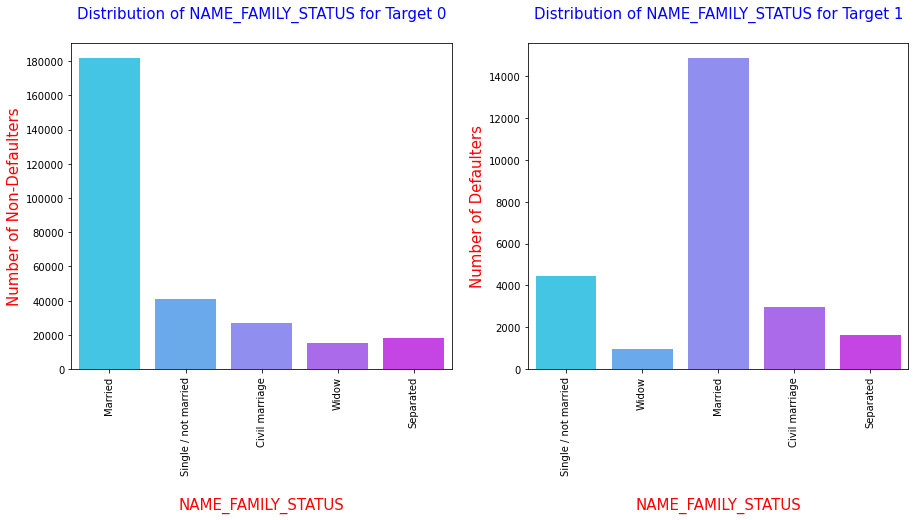

In [76]:
plt.figure(figsize = [15, 6])
plt.subplot(1, 2, 1)
y1 = sns.countplot(data = target_0, x = 'NAME_FAMILY_STATUS', palette = 'cool')
y1.yaxis.set_major_locator(ticker.MultipleLocator(20000))
plt.title('Distribution of NAME_FAMILY_STATUS for Target 0\n', fontsize = 15, color = 'blue')
plt.xlabel('\nNAME_FAMILY_STATUS', fontsize = 15, color = 'red')
plt.ylabel('Number of Non-Defaulters', fontsize = 15, color = 'red')
plt.xticks(rotation = 90)
plt.subplot(1, 2, 2)
y2 = sns.countplot(data = target_1, x = 'NAME_FAMILY_STATUS', palette = 'cool')
y2.yaxis.set_major_locator(ticker.MultipleLocator(2000))
plt.title('Distribution of NAME_FAMILY_STATUS for Target 1\n', fontsize = 15, color = 'blue')
plt.xlabel('\nNAME_FAMILY_STATUS', fontsize = 15, color = 'red')
plt.ylabel('Number of Defaulters', fontsize = 15, color = 'red')
plt.xticks(rotation = 90)
plt.show()

**INFERENCES**

1. From the above graphs, we can infer that married people are leading the number of loan applications.
2. Married people are the highest in paying the loans on time.
3. Banks should consider giving more loans to married people.

#### E. Univariate analysis for NAME_HOUSING_TYPE column

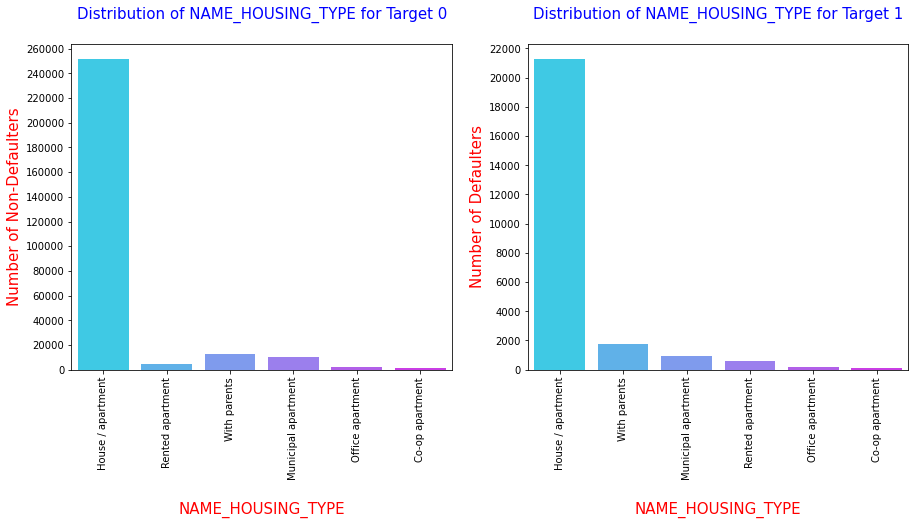

In [77]:
plt.figure(figsize = [15, 6])
plt.subplot(1, 2, 1)
y1 = sns.countplot(data = target_0, x = 'NAME_HOUSING_TYPE', palette = 'cool')
y1.yaxis.set_major_locator(ticker.MultipleLocator(20000))
plt.title('Distribution of NAME_HOUSING_TYPE for Target 0\n', fontsize = 15, color = 'blue')
plt.xlabel('\nNAME_HOUSING_TYPE', fontsize = 15, color = 'red')
plt.ylabel('Number of Non-Defaulters', fontsize = 15, color = 'red')
plt.xticks(rotation = 90)
plt.subplot(1, 2, 2)
y2 = sns.countplot(data = target_1, x = 'NAME_HOUSING_TYPE', palette = 'cool')
y2.yaxis.set_major_locator(ticker.MultipleLocator(2000))
plt.title('Distribution of NAME_HOUSING_TYPE for Target 1\n', fontsize = 15, color = 'blue')
plt.xlabel('\nNAME_HOUSING_TYPE', fontsize = 15, color = 'red')
plt.ylabel('Number of Defaulters', fontsize = 15, color = 'red')
plt.xticks(rotation = 90)
plt.show()

**INFERENCES**

1. From the above graphs, we can infer that people living in House/Apartment are leading the number of loan applications.
2. Most of the people living in House/Apartment tend to pay the loans on time.
3. People living with parents also are noticeable defaulters as they can have family commitments.
4. Banks should consider giving more loans to people staying in house/apartment.

#### F. Univariate analysis for OCCUPATION_TYPE column

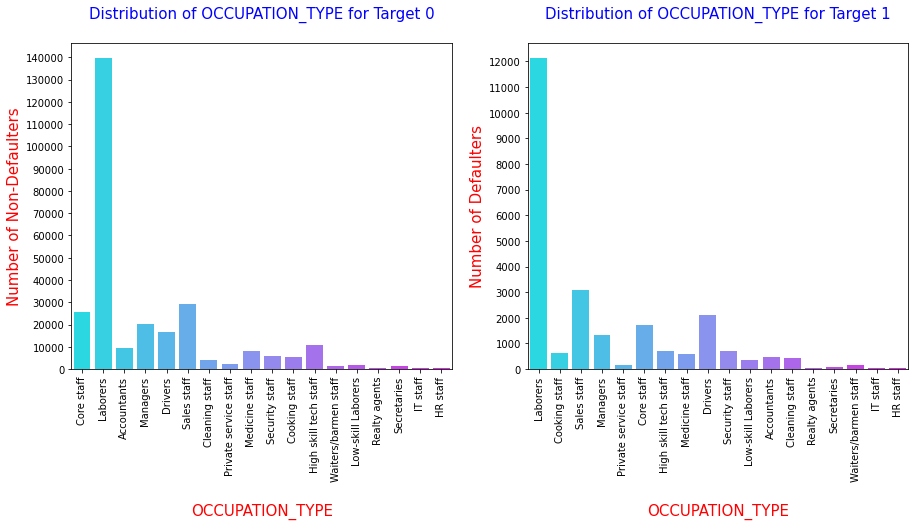

In [78]:
plt.figure(figsize = [15, 6])
plt.subplot(1, 2, 1)
y1 = sns.countplot(data = target_0, x = 'OCCUPATION_TYPE', palette = 'cool')
y1.yaxis.set_major_locator(ticker.MultipleLocator(10000))
plt.title('Distribution of OCCUPATION_TYPE for Target 0\n', fontsize = 15, color = 'blue')
plt.xlabel('\nOCCUPATION_TYPE', fontsize = 15, color = 'red')
plt.ylabel('Number of Non-Defaulters', fontsize = 15, color = 'red')
plt.xticks(rotation = 90)
plt.subplot(1, 2, 2)
y2 = sns.countplot(data = target_1, x = 'OCCUPATION_TYPE', palette = 'cool')
y2.yaxis.set_major_locator(ticker.MultipleLocator(1000))
plt.title('Distribution of OCCUPATION_TYPE for Target 1\n', fontsize = 15, color = 'blue')
plt.xlabel('\nOCCUPATION_TYPE', fontsize = 15, color = 'red')
plt.ylabel('Number of Defaulters', fontsize = 15, color = 'red')
plt.xticks(rotation = 90)
plt.show()

**INFERENCES**

1. From the above graphs, we can infer that laborers are leading the number of loan applications.
2. Most of the laborers tend to pay the loans on time.
3. The second highest defaulters are Sales staff.
4. Banks should consider giving more loans to laborers.

### 2. Categorical Ordered Univariate Analysis

**Categorical Ordered Columns**

NAME_EDUCATION_TYPE

AGE_GROUPS

INCOME_RANGE

AMT_CREDIT_RANGE

#### A. Univariate analysis for NAME_EDUCATION_TYPE column

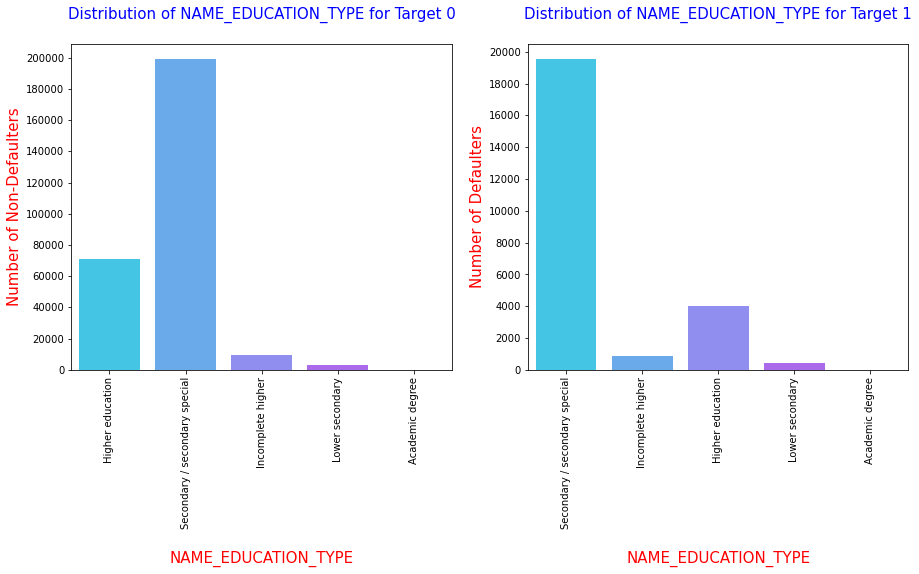

In [79]:
plt.figure(figsize = [15, 6])
plt.subplot(1, 2, 1)
y1 = sns.countplot(data = target_0, x = 'NAME_EDUCATION_TYPE', palette = 'cool')
y1.yaxis.set_major_locator(ticker.MultipleLocator(20000))
plt.title('Distribution of NAME_EDUCATION_TYPE for Target 0\n', fontsize = 15, color = 'blue')
plt.xlabel('\nNAME_EDUCATION_TYPE', fontsize = 15, color = 'red')
plt.ylabel('Number of Non-Defaulters', fontsize = 15, color = 'red')
plt.xticks(rotation = 90)
plt.subplot(1, 2, 2)
y2 = sns.countplot(data = target_1, x = 'NAME_EDUCATION_TYPE', palette = 'cool')
y2.yaxis.set_major_locator(ticker.MultipleLocator(2000))
plt.title('Distribution of NAME_EDUCATION_TYPE for Target 1\n', fontsize = 15, color = 'blue')
plt.xlabel('\nNAME_EDUCATION_TYPE', fontsize = 15, color = 'red')
plt.ylabel('Number of Defaulters', fontsize = 15, color = 'red')
plt.xticks(rotation = 90)
plt.show()

**INFERENCES**

1. From the above graphs, we can infer that most of the loan applicants completed education only till Secondary/Secondary          Special.
2. Applicants who completed Higher education are capable of paying the loans on time because of higher salary packages.
3. Banks should consider giving loans to people who are properly educated.

#### B. Univariate analysis for AGE_GROUPS column

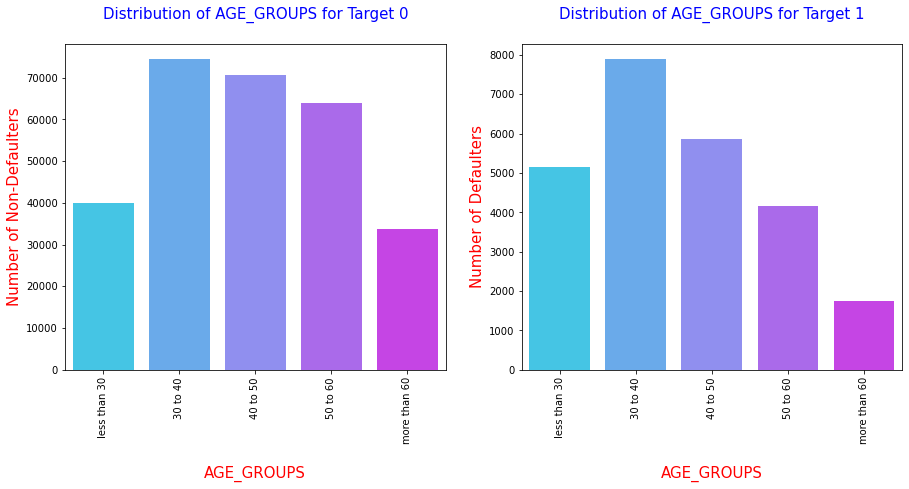

In [80]:
plt.figure(figsize = [15, 6])
plt.subplot(1, 2, 1)
y1 = sns.countplot(data = target_0, x = 'AGE_GROUPS', palette = 'cool')
y1.yaxis.set_major_locator(ticker.MultipleLocator(10000))
plt.title('Distribution of AGE_GROUPS for Target 0\n', fontsize = 15, color = 'blue')
plt.xlabel('\nAGE_GROUPS', fontsize = 15, color = 'red')
plt.ylabel('Number of Non-Defaulters', fontsize = 15, color = 'red')
plt.xticks(rotation = 90)
plt.subplot(1, 2, 2)
y2 = sns.countplot(data = target_1, x = 'AGE_GROUPS', palette = 'cool')
y2.yaxis.set_major_locator(ticker.MultipleLocator(1000))
plt.title('Distribution of AGE_GROUPS for Target 1\n', fontsize = 15, color = 'blue')
plt.xlabel('\nAGE_GROUPS', fontsize = 15, color = 'red')
plt.ylabel('Number of Defaulters', fontsize = 15, color = 'red')
plt.xticks(rotation = 90)
plt.show()

**INFERENCES**

1. From the above graphs, we can infer that most of the loan applicants are aged between 30 and 40.
2. Applicants in age group 30 to 40 tend to pay the loans on time.
3. Banks should consider this age group more when giving loans.

#### C. Univariate analysis for INCOME_RANGE column

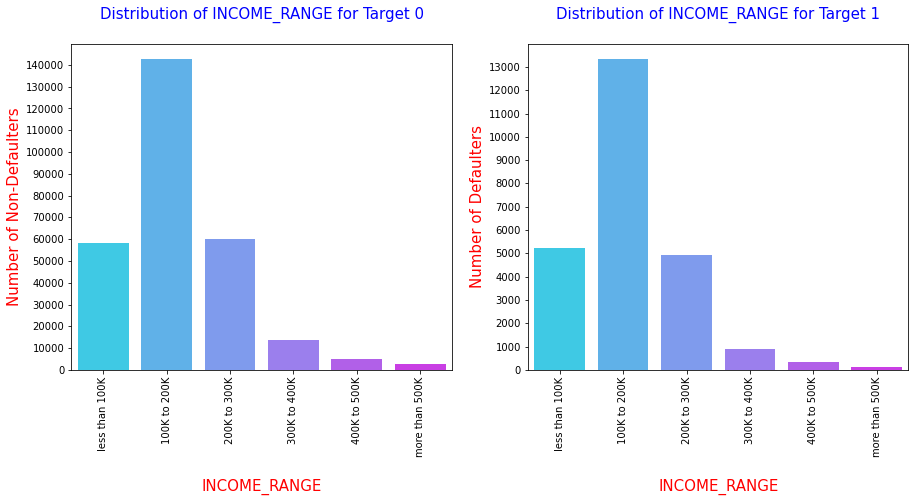

In [81]:
plt.figure(figsize = [15, 6])
plt.subplot(1, 2, 1)
y1 = sns.countplot(data = target_0, x = 'INCOME_RANGE', palette = 'cool')
y1.yaxis.set_major_locator(ticker.MultipleLocator(10000))
plt.title('Distribution of INCOME_RANGE for Target 0\n', fontsize = 15, color = 'blue')
plt.xlabel('\nINCOME_RANGE', fontsize = 15, color = 'red')
plt.ylabel('Number of Non-Defaulters', fontsize = 15, color = 'red')
plt.xticks(rotation = 90)
plt.subplot(1, 2, 2)
y2 = sns.countplot(data = target_1, x = 'INCOME_RANGE', palette = 'cool')
y2.yaxis.set_major_locator(ticker.MultipleLocator(1000))
plt.title('Distribution of INCOME_RANGE for Target 1\n', fontsize = 15, color = 'blue')
plt.xlabel('\nINCOME_RANGE', fontsize = 15, color = 'red')
plt.ylabel('Number of Defaulters', fontsize = 15, color = 'red')
plt.xticks(rotation = 90)
plt.show()

**INFERENCES**

1. From the above graphs, we can infer that most of the loan applicants have income in the range 100K to 200K and they tend to      pay the loans on time.
2. Banks should consider applicants with this income range when giving loans.

#### D. Univariate analysis for AMT_CREDIT_RANGE column

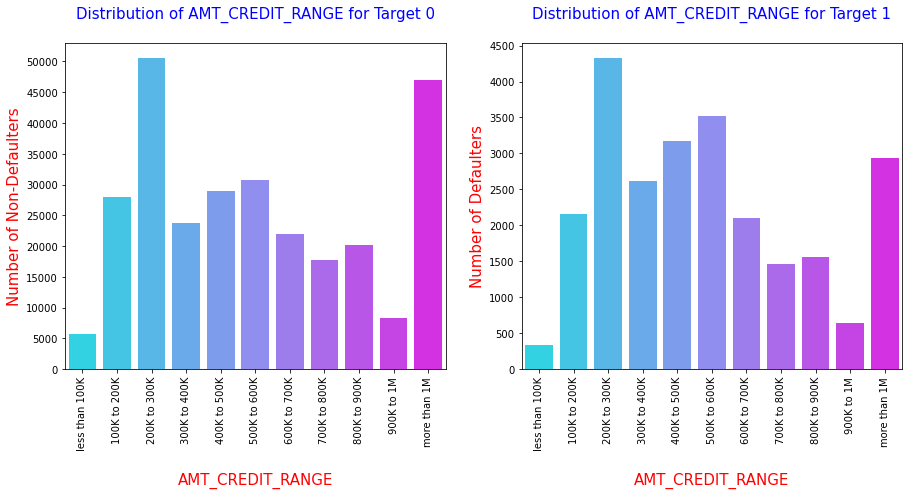

In [82]:
plt.figure(figsize = [15, 6])
plt.subplot(1, 2, 1)
y1 = sns.countplot(data = target_0, x = 'AMT_CREDIT_RANGE', palette = 'cool')
y1.yaxis.set_major_locator(ticker.MultipleLocator(5000))
plt.title('Distribution of AMT_CREDIT_RANGE for Target 0\n', fontsize = 15, color = 'blue')
plt.xlabel('\nAMT_CREDIT_RANGE', fontsize = 15, color = 'red')
plt.ylabel('Number of Non-Defaulters', fontsize = 15, color = 'red')
plt.xticks(rotation = 90)
plt.subplot(1, 2, 2)
y2 = sns.countplot(data = target_1, x = 'AMT_CREDIT_RANGE', palette = 'cool')
y2.yaxis.set_major_locator(ticker.MultipleLocator(500))
plt.title('Distribution of AMT_CREDIT_RANGE for Target 1\n', fontsize = 15, color = 'blue')
plt.xlabel('\nAMT_CREDIT_RANGE', fontsize = 15, color = 'red')
plt.ylabel('Number of Defaulters', fontsize = 15, color = 'red')
plt.xticks(rotation = 90)
plt.show()

**INFERENCES**

1. From the above graphs, we can infer that credit amount in the range 200K to 300K is the highest with both non-defaulters and    defaulters.
2. The second highest credit amount range is more than 1M (1 Million).

### 3. Numerical - Categorical Univariate Analysis

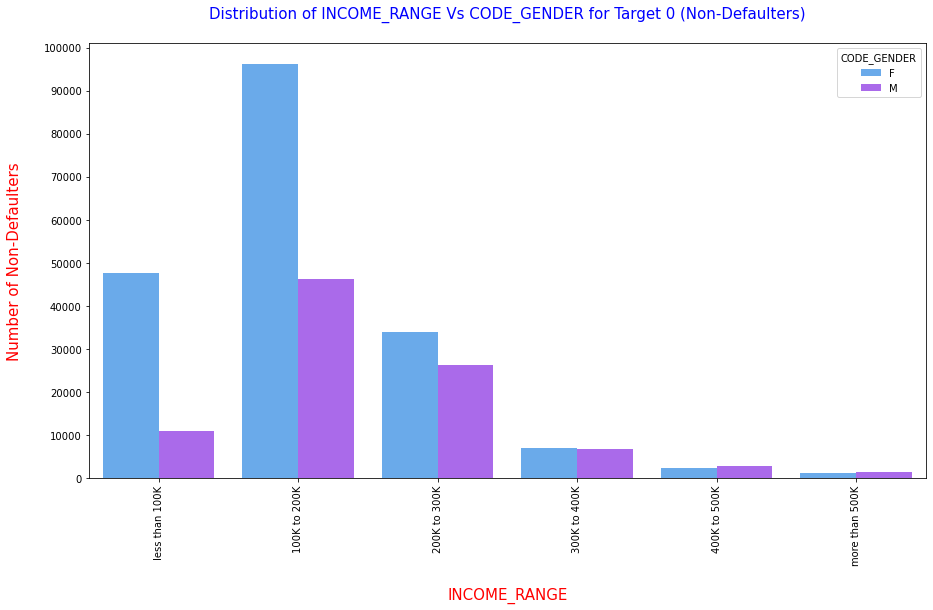

In [83]:
# 3.1.1 Distribution of INCOME_RANGE Vs CODE_GENDER for Target 0 (Non-Defaulters)

plt.figure(figsize = [15, 8])
y1 = sns.countplot(data = target_0, x = 'INCOME_RANGE', palette = 'cool', hue = 'CODE_GENDER')
y1.yaxis.set_major_locator(ticker.MultipleLocator(10000))
plt.title('Distribution of INCOME_RANGE Vs CODE_GENDER for Target 0 (Non-Defaulters)\n', fontsize = 15, color = 'blue')
plt.xlabel('\nINCOME_RANGE', fontsize = 15, color = 'red')
plt.ylabel('Number of Non-Defaulters\n', fontsize = 15, color = 'red')
plt.xticks(rotation = 90)
plt.show()

**INFERENCES**

1. From the above graph, we can infer that income in the range 100K to 200K is the highest in which particularly females tend to    pay the loans on time.
2. The proportions of females are bigger than males mostly which means that females are less defaulters than males.

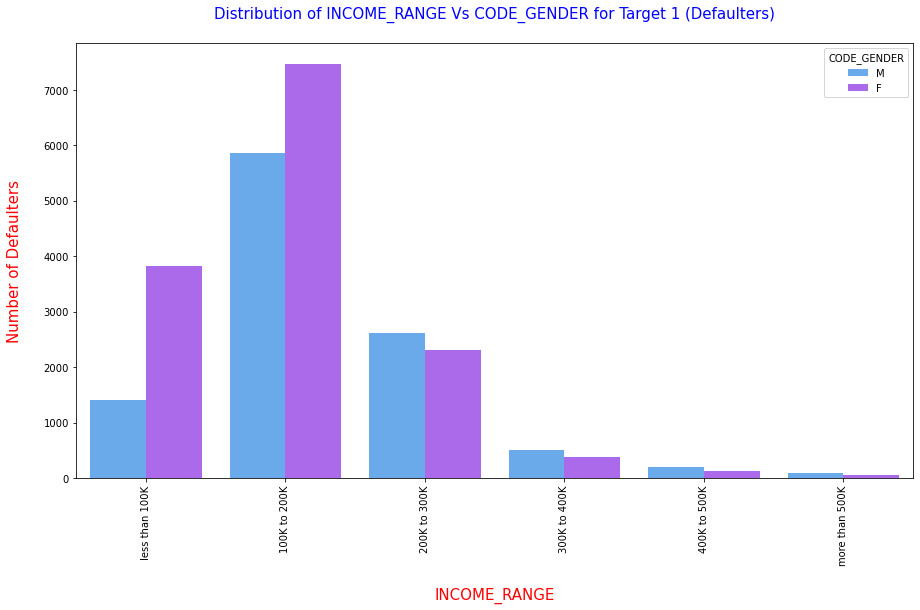

In [84]:
# 3.1.2 Distribution of INCOME_RANGE Vs CODE_GENDER for Target 1 (Defaulters)

plt.figure(figsize = [15, 8])
y1 = sns.countplot(data = target_1, x = 'INCOME_RANGE', palette = 'cool', hue = 'CODE_GENDER')
y1.yaxis.set_major_locator(ticker.MultipleLocator(1000))
plt.title('Distribution of INCOME_RANGE Vs CODE_GENDER for Target 1 (Defaulters)\n', fontsize = 15, color = 'blue')
plt.xlabel('\nINCOME_RANGE', fontsize = 15, color = 'red')
plt.ylabel('Number of Defaulters\n', fontsize = 15, color = 'red')
plt.xticks(rotation = 90)
plt.show()

**INFERENCES**

1. From the above graph, we can infer that the proportions of males are bigger than females mostly which means that males are      more defaulters than females.

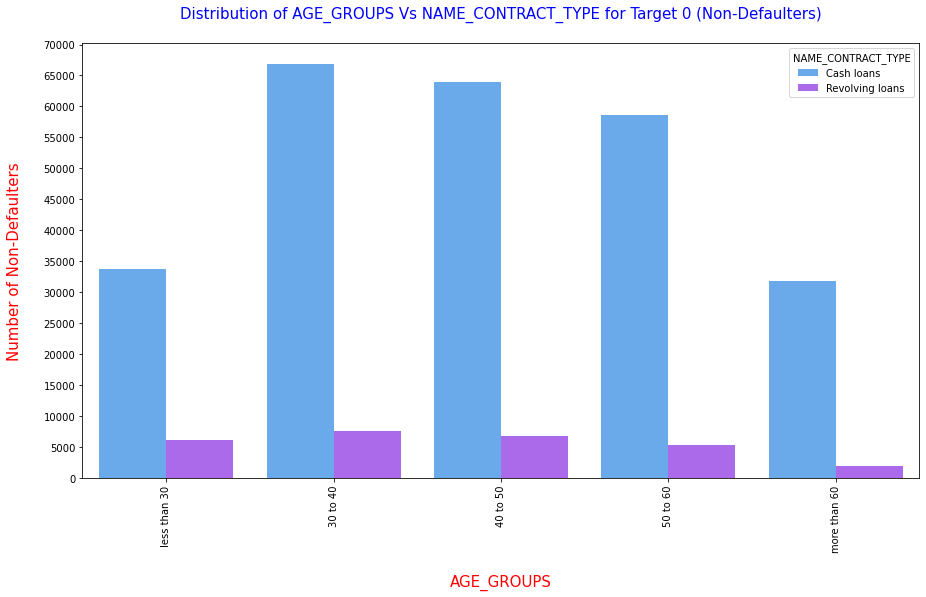

In [85]:
# 3.2.1 Distribution of AGE_GROUPS Vs NAME_CONTRACT_TYPE for Target 0 (Non-Defaulters)

plt.figure(figsize = [15, 8])
y1 = sns.countplot(data = target_0, x = 'AGE_GROUPS', palette = 'cool', hue = 'NAME_CONTRACT_TYPE')
y1.yaxis.set_major_locator(ticker.MultipleLocator(5000))
plt.title('Distribution of AGE_GROUPS Vs NAME_CONTRACT_TYPE for Target 0 (Non-Defaulters)\n', fontsize = 15, color = 'blue')
plt.xlabel('\nAGE_GROUPS', fontsize = 15, color = 'red')
plt.ylabel('Number of Non-Defaulters\n', fontsize = 15, color = 'red')
plt.xticks(rotation = 90)
plt.show()

**INFERENCES**

1. From the above graph, we can infer that 30 to 40, 40 to 50 and 50 to 60 are among the highest age groups opting for cash        loans.
2. more than 60 is the age groups that is least opting for both cash loans and revolving loans.

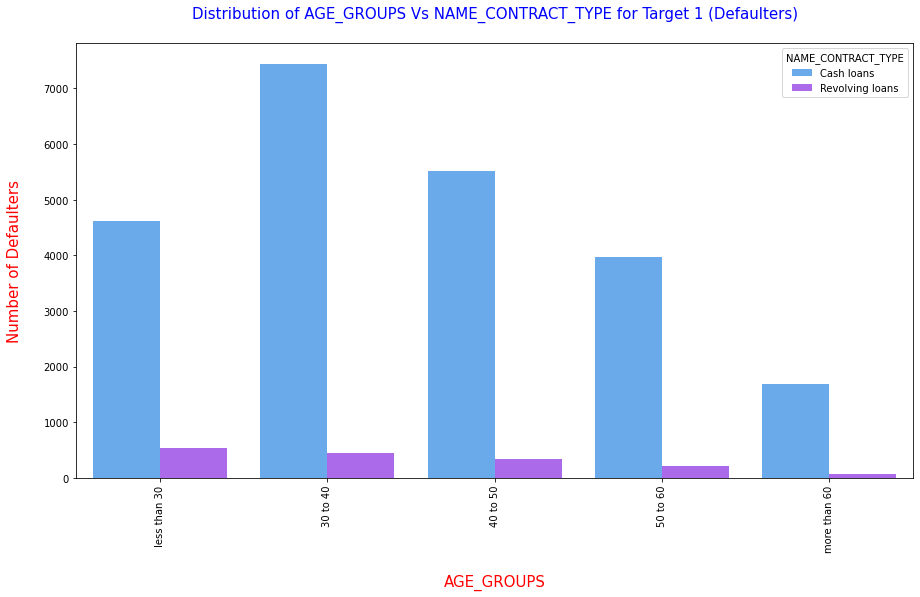

In [86]:
# 3.2.2 Distribution of AGE_GROUPS Vs NAME_CONTRACT_TYPE for Target 1 (Defaulters)

plt.figure(figsize = [15, 8])
y1 = sns.countplot(data = target_1, x = 'AGE_GROUPS', palette = 'cool', hue = 'NAME_CONTRACT_TYPE')
y1.yaxis.set_major_locator(ticker.MultipleLocator(1000))
plt.title('Distribution of AGE_GROUPS Vs NAME_CONTRACT_TYPE for Target 1 (Defaulters)\n', fontsize = 15, color = 'blue')
plt.xlabel('\nAGE_GROUPS', fontsize = 15, color = 'red')
plt.ylabel('Number of Defaulters\n', fontsize = 15, color = 'red')
plt.xticks(rotation = 90)
plt.show()

**INFERENCES**

1. From the above graph, we can infer that 30 to 40 is the highest age group opting for cash loans.
2. more than 60 is the age group that is least opting for both cash loans and revolving loans.

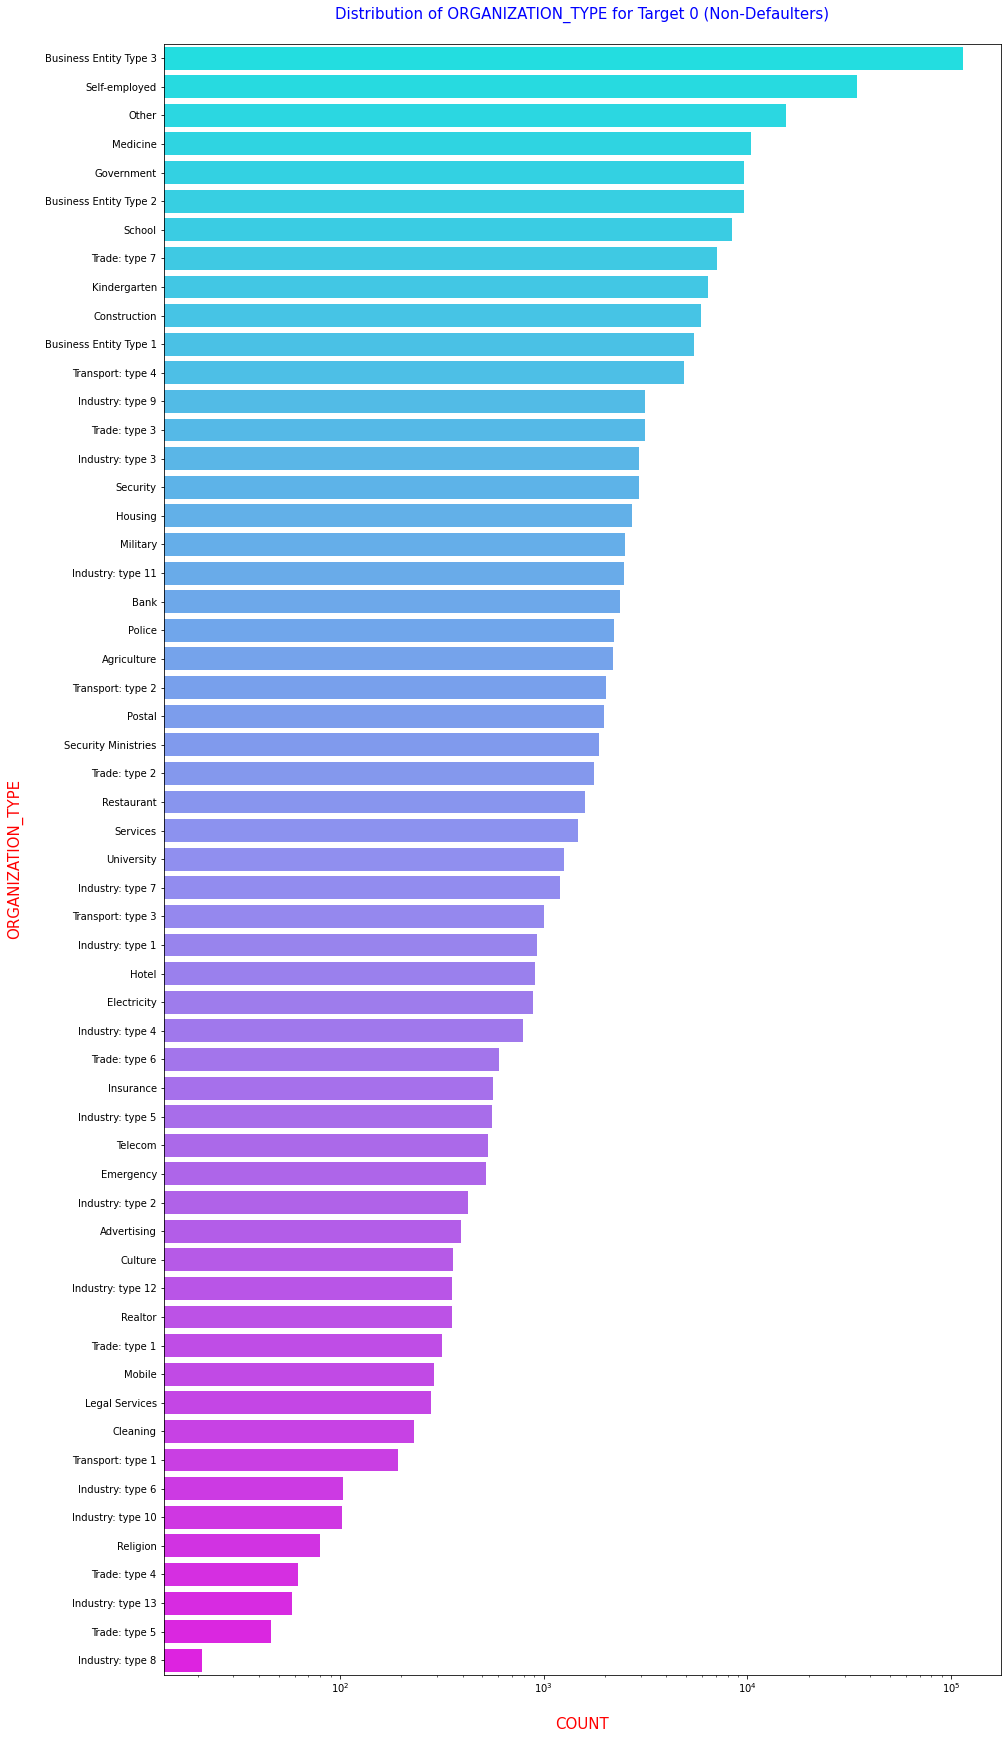

In [146]:
# Distribution of ORGANIZATION_TYPE for Target 0 (Non-Defaulters)

plt.figure(figsize = [15, 30])
sns.countplot(data = target_0, y = 'ORGANIZATION_TYPE', palette = 'cool', order = target_0['ORGANIZATION_TYPE'].value_counts().index)
plt.title('Distribution of ORGANIZATION_TYPE for Target 0 (Non-Defaulters)\n', fontsize = 15, color = 'blue')
plt.xlabel('\nCOUNT', fontsize = 15, color = 'red')
plt.ylabel('ORGANIZATION_TYPE\n', fontsize = 15, color = 'red')
plt.xscale('log')
plt.show()

**INFERENCES**

1. Applicants who applied for the loan are mostly from Business Entity Type 3, Self-employed and Other organization types.
2. Applicants are less from Industry: type 8, Trade: type 5, Industry: type 13 organizations types.

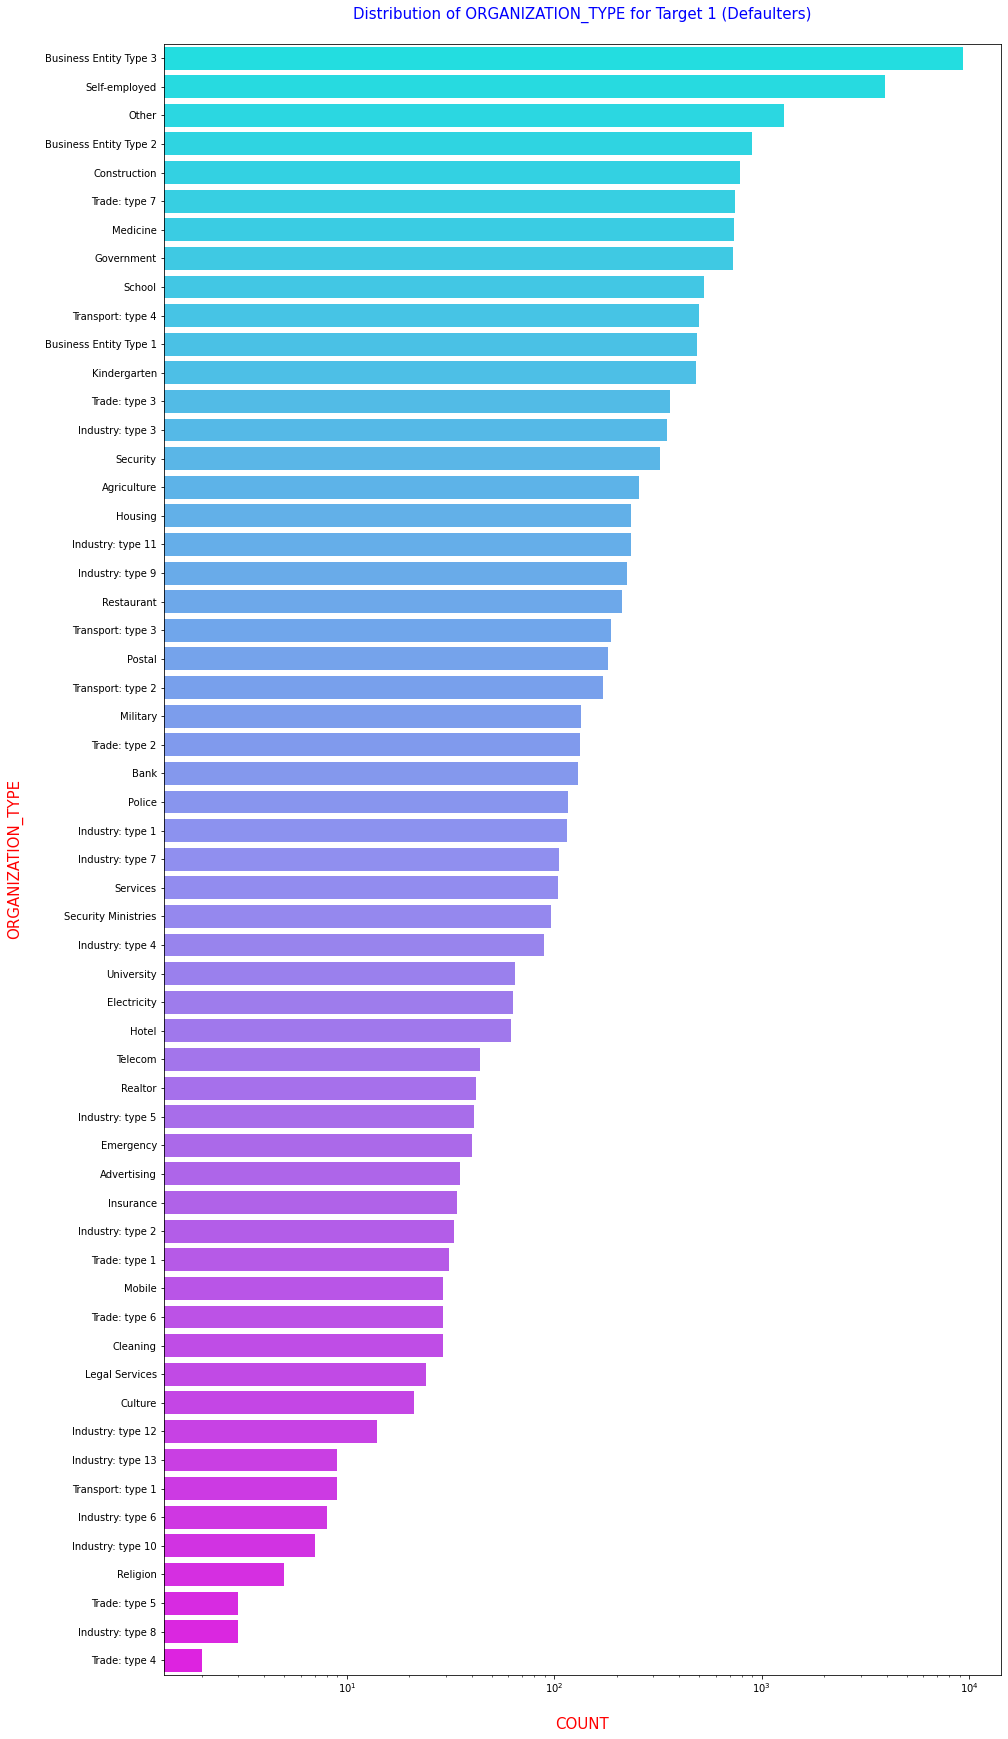

In [147]:
# Distribution of ORGANIZATION_TYPE for Target 1 (Defaulters)

plt.figure(figsize = [15, 30])
sns.countplot(data = target_1, y = 'ORGANIZATION_TYPE', palette = 'cool', order = target_1['ORGANIZATION_TYPE'].value_counts().index)
plt.title('Distribution of ORGANIZATION_TYPE for Target 1 (Defaulters)\n', fontsize = 15, color = 'blue')
plt.xlabel('\nCOUNT', fontsize = 15, color = 'red')
plt.ylabel('ORGANIZATION_TYPE\n', fontsize = 15, color = 'red')
plt.xscale('log')
plt.show()

**INFERENCES**

1. Applicants who applied for the loan are mostly from Business Entity Type 3, Self-employed and Other organization types.
2. Applicants are less from Industry: type 8, Trade: type 5, Industry: type 13 organizations types.

## BIVARIATE ANALYSIS

#### We will perform the below Bivariate analysis on both target_0 and target_1

1. Numerical - Numerical Bivariate Analysis
2. Correlation, Multivariate Analysis

###  1. We'll use the below columns for Numerical - Numerical Bivariate Analysis

AMT_CREDIT

AMT_ANNUITY

AMT_GOODS_PRICE

AMT_INCOME_TOTAL               

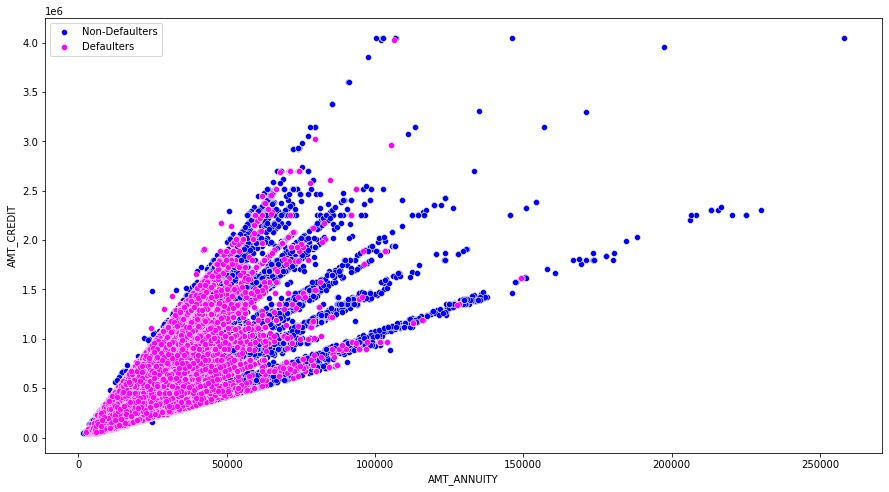

In [89]:
# Distribution of AMT_ANNUITY and AMT_CREDIT for both Target 0 (Non-Defaulters) and Target 1 (Defaulters)

plt.figure(figsize = [15, 8])
sns.scatterplot(data = target_0, x = 'AMT_ANNUITY',  y = 'AMT_CREDIT', label = 'Non-Defaulters', color = 'blue')
sns.scatterplot(data = target_1, x = 'AMT_ANNUITY',  y = 'AMT_CREDIT', label = 'Defaulters', color = 'magenta')
plt.show() 

**INFERENCES**

1. From the above scatterplot, we can infer that the two variables (AMT_ANNUITY, AMT_CREDIT) are fairly correlated.
2. Most of the defaulters are having AMT_ANNUITY values less than 80000, but after 80000, there's a decrease in the                defaulters.

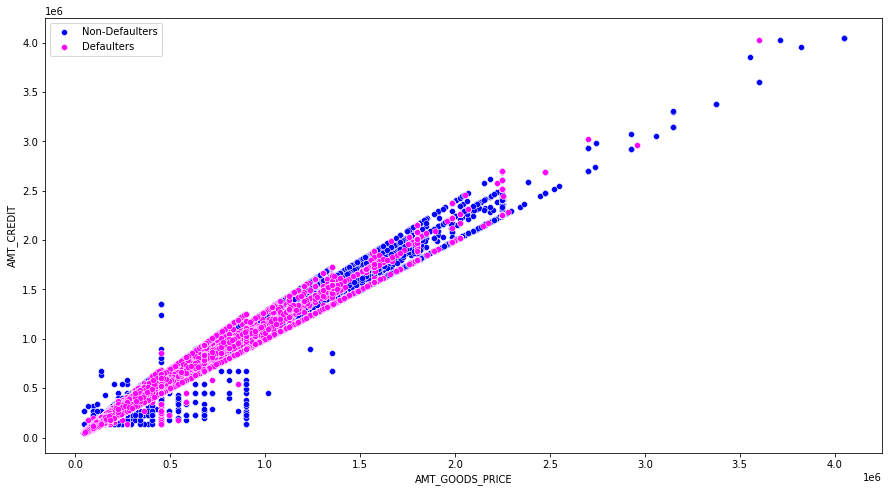

In [90]:
# Distribution of AMT_GOODS_PRICE and AMT_CREDIT for both Target 0 (Non-Defaulters) and Target 1 (Defaulters)

plt.figure(figsize = [15, 8])
sns.scatterplot(data = target_0, x = 'AMT_GOODS_PRICE',  y = 'AMT_CREDIT', label = 'Non-Defaulters', color = 'blue')
sns.scatterplot(data = target_1, x = 'AMT_GOODS_PRICE',  y = 'AMT_CREDIT', label = 'Defaulters', color = 'magenta')
plt.show()

**INFERENCES**

1. From the above scatterplot, we can infer that the two variables (AMT_GOODS_PRICE, AMT_CREDIT) are strongly correlated as there's a liner increase in the values of both the variables.

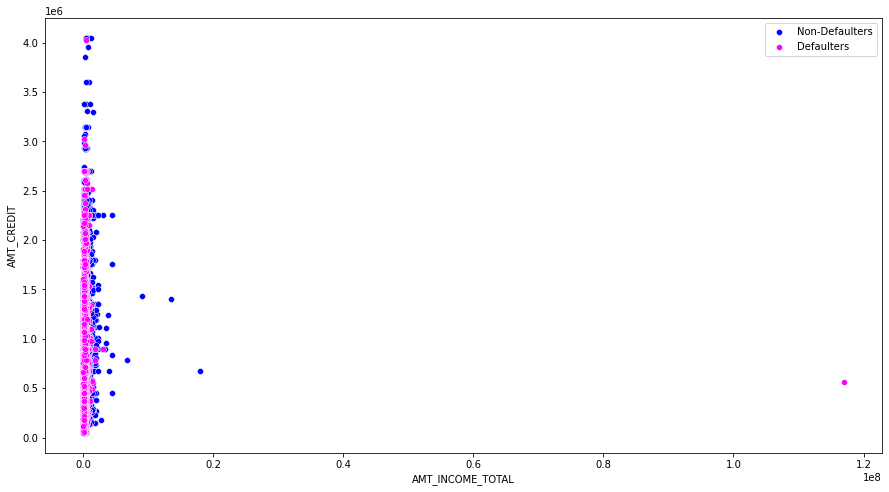

In [91]:
# Distribution of AMT_INCOME_TOTAL and AMT_CREDIT for both Target 0 (Non-Defaulters) and Target 1 (Defaulters)

plt.figure(figsize = [15, 8])
sns.scatterplot(data = target_0, x = 'AMT_INCOME_TOTAL',  y = 'AMT_CREDIT', label = 'Non-Defaulters', color = 'blue')
sns.scatterplot(data = target_1, x = 'AMT_INCOME_TOTAL',  y = 'AMT_CREDIT', label = 'Defaulters', color = 'magenta')
plt.show()

**INFERENCES**

1. From the above scatterplot, we can infer that the two variables (AMT_INCOME_TOTAL, AMT_CREDIT) have no correlation because when AMT_CREDIT is increasing, AMT_INCOME_TOTAL is constant. So, there's no linear correlation between them.
2. There is hardly one scatter points which has high income but the credit amount is not very high for it as well.

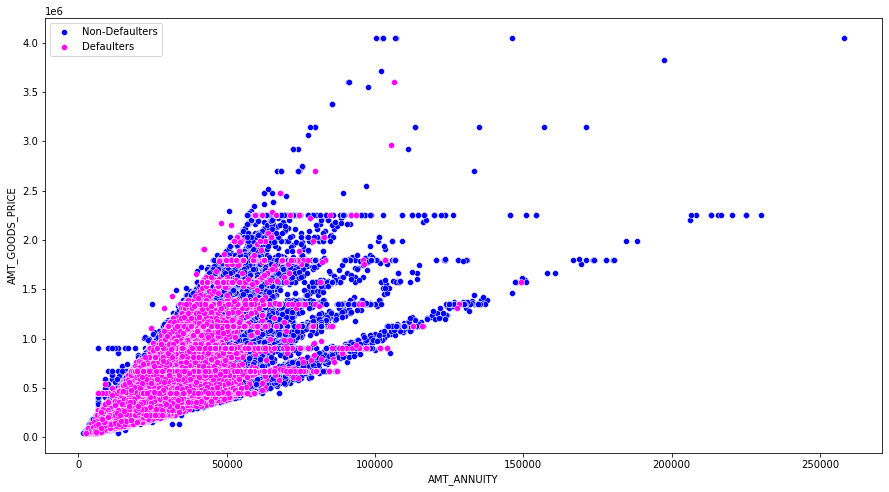

In [92]:
# Distribution of AMT_ANNUITY and AMT_GOODS_PRICE for both Target 0 (Non-Defaulters) and Target 1 (Defaulters)

plt.figure(figsize = [15, 8])
sns.scatterplot(data = target_0, x = 'AMT_ANNUITY',  y = 'AMT_GOODS_PRICE', label = 'Non-Defaulters', color = 'blue')
sns.scatterplot(data = target_1, x = 'AMT_ANNUITY',  y = 'AMT_GOODS_PRICE', label = 'Defaulters', color = 'magenta')
plt.show()

**INFERENCES**

1. From the above scatterplot, we can infer that the two variables (AMT_ANNUITY, AMT_GOODS_PRICE) are moderately correlated.
2. Most defaulters have AMT_ANNUITY values less than 100000. Beyond 100000, there is a noticeable decrease in the defaulters.

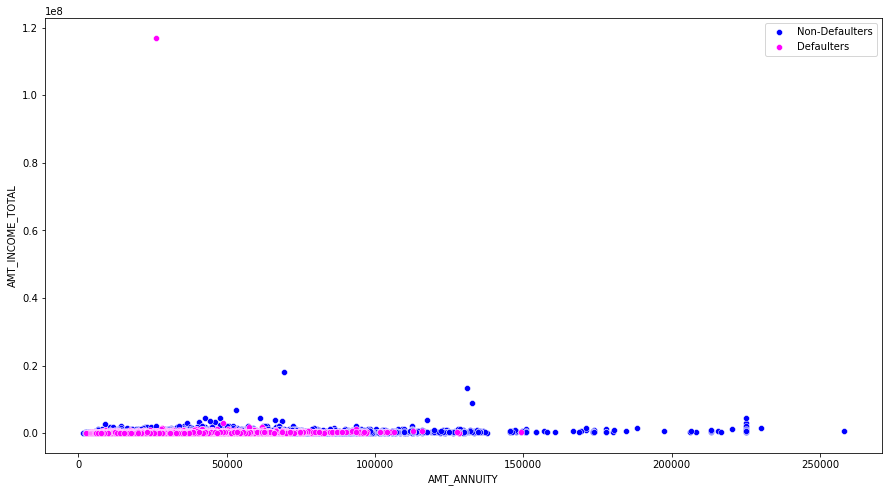

In [93]:
# Distribution of AMT_ANNUITY and AMT_INCOME_TOTAL for both Target 0 (Non-Defaulters) and Target 1 (Defaulters)

plt.figure(figsize = [15, 8])
sns.scatterplot(data = target_0, x = 'AMT_ANNUITY',  y = 'AMT_INCOME_TOTAL', label = 'Non-Defaulters', color = 'blue')
sns.scatterplot(data = target_1, x = 'AMT_ANNUITY',  y = 'AMT_INCOME_TOTAL', label = 'Defaulters', color = 'magenta')
plt.show()

**INFERENCES**

1. From the above scatterplot, we can infer that the two variables (AMT_ANNUITY, AMT_INCOME_TOTAL) have no correlation because      when AMT_ANNUITY is increasing, AMT_INCOME_TOTAL is constant.
2. Most defaulters have AMT_ANNUITY values less than 100000. Beyond 100000, there is a decrease in the defaulters.

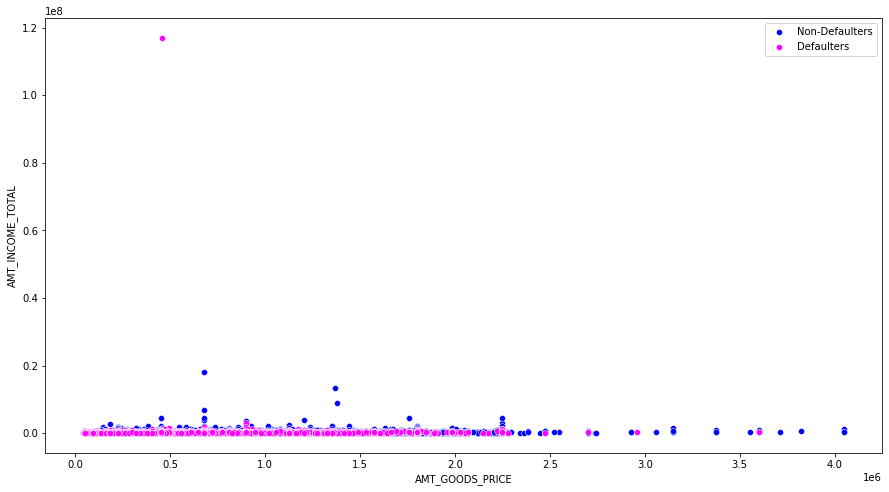

In [94]:
# Distribution of AMT_GOODS_PRICE and AMT_INCOME_TOTAL for both Target 0 (Non-Defaulters) and Target 1 (Defaulters)

plt.figure(figsize = [15, 8])
sns.scatterplot(data = target_0, x = 'AMT_GOODS_PRICE',  y = 'AMT_INCOME_TOTAL', label = 'Non-Defaulters', color = 'blue')
sns.scatterplot(data = target_1, x = 'AMT_GOODS_PRICE',  y = 'AMT_INCOME_TOTAL', label = 'Defaulters', color = 'magenta')
plt.show()

**INFERENCES**

1. From the above scatterplot, we can infer that the two variables (AMT_GOODS_PRICE, AMT_INCOME_TOTAL) have no correlation          because when AMT_GOODS_PRICE is increasing, AMT_INCOME_TOTAL is constant.

### 2. Correlation, Multivariate Analysis

### Target 0 (Non-Defaulters)

In [95]:
# Dropping the columns which are not required for Target 0

drop_columns = ['SK_ID_CURR', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 
                'DEF_60_CNT_SOCIAL_CIRCLE']
target_0 = target_0.drop(columns = drop_columns)

In [96]:
# Creating a correlation matrix for the Non-Defaulters and storing it in a variable 'correlation_target_0'
# Displaying the matrix

correlation_target_0 = target_0.corr().abs().round(3)
correlation_target_0

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,NaN,1.000,0.027,0.003,0.021,0.001,0.024,0.337,0.245,0.186,0.029,0.879,0.023,0.005
AMT_INCOME_TOTAL,NaN,0.027,1.000,0.343,0.419,0.349,0.168,0.063,0.140,0.065,0.023,0.034,0.187,0.077
AMT_CREDIT,NaN,0.003,0.343,1.000,0.771,0.987,0.101,0.047,0.070,0.013,0.001,0.065,0.103,0.054
AMT_ANNUITY,NaN,0.021,0.419,0.771,1.000,0.776,0.121,0.012,0.105,0.039,0.014,0.076,0.132,0.054
AMT_GOODS_PRICE,NaN,0.001,0.349,0.987,0.776,1.000,0.104,0.045,0.069,0.016,0.004,0.063,0.104,0.063
REGION_POPULATION_RELATIVE,NaN,0.024,0.168,0.101,0.121,0.104,1.000,0.025,0.007,0.052,0.001,0.023,0.539,0.173
DAYS_BIRTH,NaN,0.337,0.063,0.047,0.012,0.045,0.025,1.000,0.626,0.333,0.271,0.286,0.002,0.096
DAYS_EMPLOYED,NaN,0.245,0.140,0.070,0.105,0.069,0.007,0.626,1.000,0.215,0.277,0.238,0.038,0.095
DAYS_REGISTRATION,NaN,0.186,0.065,0.013,0.039,0.016,0.052,0.333,0.215,1.000,0.100,0.176,0.076,0.008


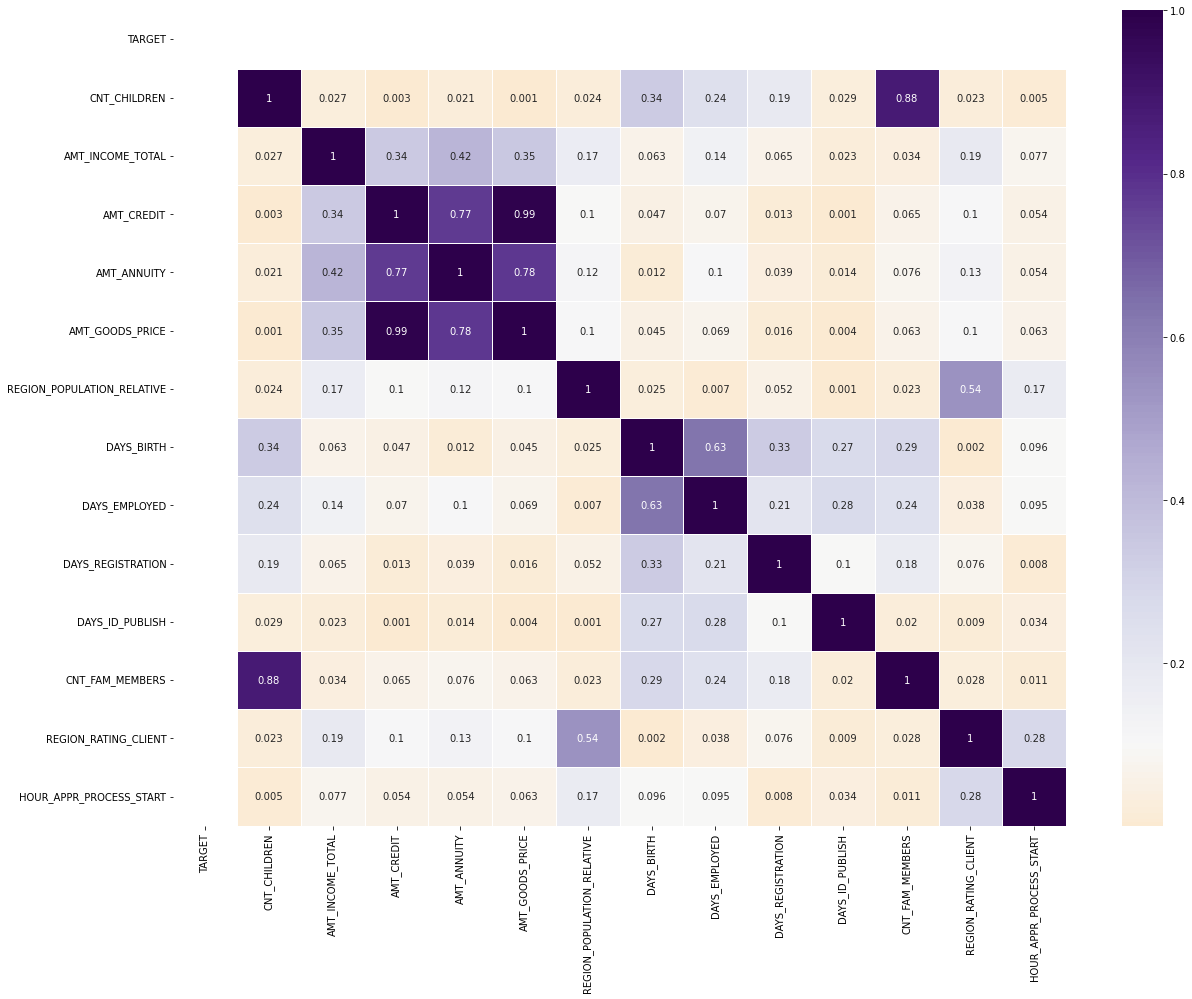

In [97]:
# We'll use a heatmap to display the above matrix in the form of a visualization

plt.figure(figsize = [20, 15])
sns.heatmap(data = correlation_target_0, cmap = 'PuOr', annot = True, linewidths = 0.5, center = 0.1)
plt.show()

In [98]:
# Unstacking the correlation of target_0 variable and storing it in a variable 'unstacked_target_0'
# Displaying the 'unstacked_target_0' variable

unstacked_target_0 = correlation_target_0.unstack()
unstacked_target_0

TARGET                   TARGET                       NaN
                         CNT_CHILDREN                 NaN
                         AMT_INCOME_TOTAL             NaN
                         AMT_CREDIT                   NaN
                         AMT_ANNUITY                  NaN
                                                    ...  
HOUR_APPR_PROCESS_START  DAYS_REGISTRATION          0.008
                         DAYS_ID_PUBLISH            0.034
                         CNT_FAM_MEMBERS            0.011
                         REGION_RATING_CLIENT       0.284
                         HOUR_APPR_PROCESS_START    1.000
Length: 196, dtype: float64

### Finding top 10 correlation among clients with payment difficulties (Target 0)

In [99]:
target_0_correlation = unstacked_target_0[unstacked_target_0.index.get_level_values(0) != unstacked_target_0.index.get_level_values(1)].sort_values(ascending = False, kind = 'quicksort').drop_duplicates()

# Since 'target_0_correlation' variable is not a dataframe, we're converting it into a dataframe

top_10_correlation_target_0 = pd.DataFrame(target_0_correlation)

# Resetting the index and renaming the the columns

top_10_correlation_target_0 = top_10_correlation_target_0.reset_index().rename(columns = {'level_0':'VAR1', 'level_1':'VAR2', 0:'Correlation'}).dropna()

# Displaying the first 10 rows

top_10_correlation_target_0.head(10)

,VAR1,VAR2,Correlation
0,AMT_CREDIT,AMT_GOODS_PRICE,0.987
1,CNT_CHILDREN,CNT_FAM_MEMBERS,0.879
2,AMT_ANNUITY,AMT_GOODS_PRICE,0.776
3,AMT_CREDIT,AMT_ANNUITY,0.771
4,DAYS_BIRTH,DAYS_EMPLOYED,0.626
5,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,0.539
6,AMT_INCOME_TOTAL,AMT_ANNUITY,0.419
7,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,0.349
8,AMT_CREDIT,AMT_INCOME_TOTAL,0.343
9,CNT_CHILDREN,DAYS_BIRTH,0.337


### Target 1 (Defaulters)

In [100]:
# Dropping the columns which are not required for Target 1

target_1 = target_1.drop(columns = drop_columns)

In [101]:
# Creating a correlation matrix for the Defaulters and storing it in a variable 'correlation_target_1'
# Displaying the matrix

correlation_target_1 = target_1.corr().abs().round(3)
correlation_target_1

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,NaN,1.000,0.005,0.002,0.031,0.008,0.032,0.259,0.193,0.149,0.032,0.885,0.041,0.024
AMT_INCOME_TOTAL,NaN,0.005,1.000,0.038,0.046,0.038,0.009,0.003,0.015,0.000,0.004,0.007,0.021,0.014
AMT_CREDIT,NaN,0.002,0.038,1.000,0.752,0.983,0.069,0.135,0.002,0.026,0.052,0.051,0.059,0.032
AMT_ANNUITY,NaN,0.031,0.046,0.752,1.000,0.752,0.072,0.014,0.081,0.034,0.017,0.076,0.074,0.031
AMT_GOODS_PRICE,NaN,0.008,0.038,0.983,0.752,1.000,0.076,0.136,0.007,0.026,0.056,0.047,0.066,0.044
REGION_POPULATION_RELATIVE,NaN,0.032,0.009,0.069,0.072,0.076,1.000,0.048,0.016,0.056,0.016,0.030,0.443,0.143
DAYS_BIRTH,NaN,0.259,0.003,0.135,0.014,0.136,0.048,1.000,0.582,0.289,0.253,0.203,0.034,0.062
DAYS_EMPLOYED,NaN,0.193,0.015,0.002,0.081,0.007,0.016,0.582,1.000,0.192,0.229,0.187,0.003,0.060
DAYS_REGISTRATION,NaN,0.149,0.000,0.026,0.034,0.026,0.056,0.289,0.192,1.000,0.097,0.146,0.104,0.033


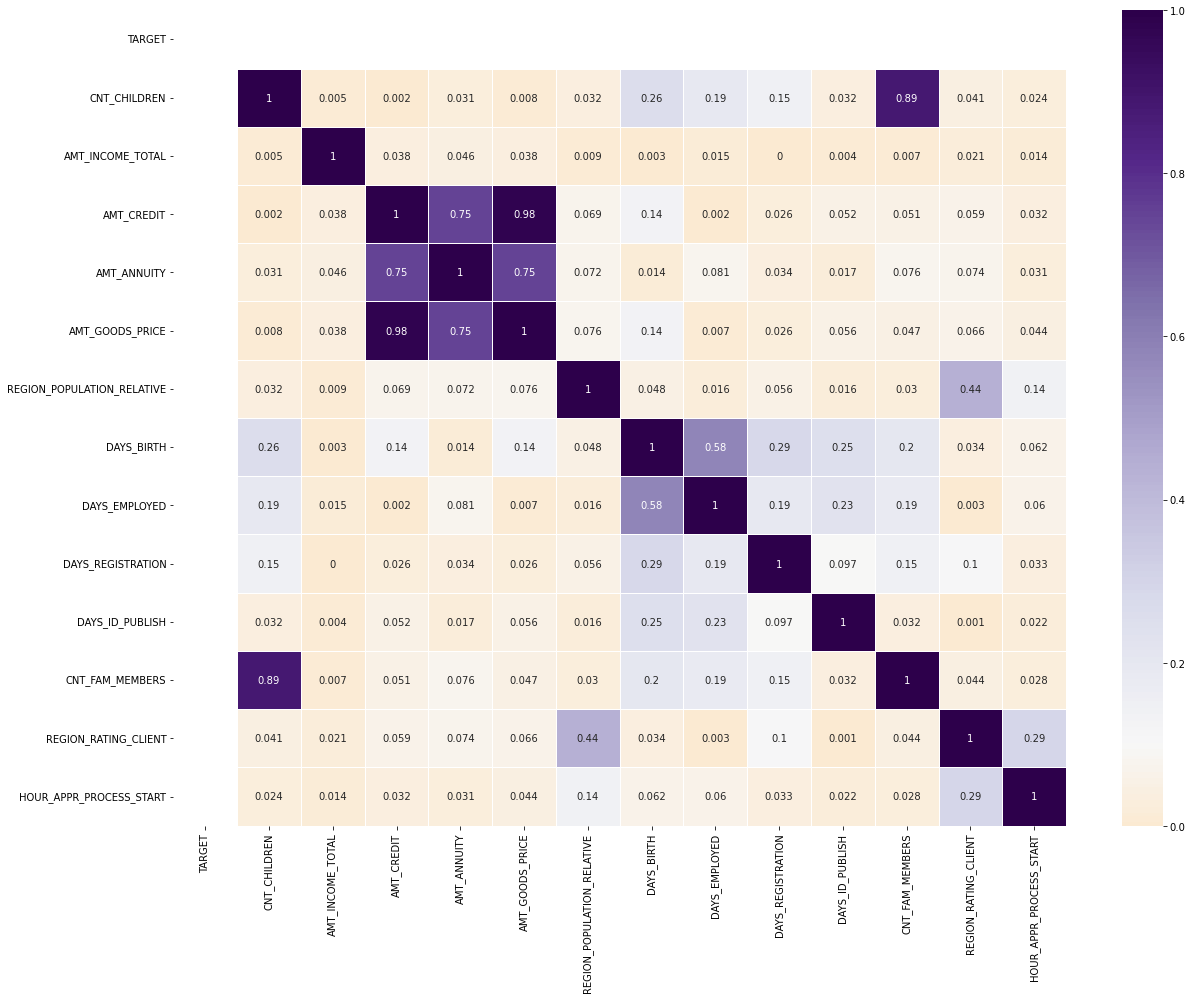

In [102]:
# We'll use a heatmap to display the above matrix in the form of a visualization

plt.figure(figsize = [20, 15])
sns.heatmap(data = correlation_target_1, cmap = 'PuOr', annot = True, linewidths = 0.5, center = 0.1)
plt.show()

In [103]:
# Unstacking the correlation of target_1 variable and storing it in a variable 'unstacked_target_1'
# Displaying the 'unstacked_target_1' variable

unstacked_target_1 = correlation_target_1.unstack()
unstacked_target_1

TARGET                   TARGET                       NaN
                         CNT_CHILDREN                 NaN
                         AMT_INCOME_TOTAL             NaN
                         AMT_CREDIT                   NaN
                         AMT_ANNUITY                  NaN
                                                    ...  
HOUR_APPR_PROCESS_START  DAYS_REGISTRATION          0.033
                         DAYS_ID_PUBLISH            0.022
                         CNT_FAM_MEMBERS            0.028
                         REGION_RATING_CLIENT       0.294
                         HOUR_APPR_PROCESS_START    1.000
Length: 196, dtype: float64

### Finding top 10 correlation among clients with payment difficulties (Target 1)

In [104]:
target_1_correlation = unstacked_target_1[unstacked_target_1.index.get_level_values(0) != unstacked_target_1.index.get_level_values(1)].sort_values(ascending = False, kind = 'quicksort').drop_duplicates()

# Since 'target_0_correlation' variable is not a dataframe, we're converting it into a dataframe

top_10_correlation_target_1 = pd.DataFrame(target_1_correlation)

# Resetting the index and renaming the the columns

top_10_correlation_target_1 = top_10_correlation_target_1.reset_index().rename(columns = {'level_0':'VAR1', 'level_1':'VAR2', 0:'Correlation'}).dropna()

# Displaying the first 10 rows

top_10_correlation_target_1.head(10)

,VAR1,VAR2,Correlation
0,AMT_GOODS_PRICE,AMT_CREDIT,0.983
1,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885
2,AMT_CREDIT,AMT_ANNUITY,0.752
3,DAYS_BIRTH,DAYS_EMPLOYED,0.582
4,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,0.443
5,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,0.294
6,DAYS_REGISTRATION,DAYS_BIRTH,0.289
7,CNT_CHILDREN,DAYS_BIRTH,0.259
8,DAYS_BIRTH,DAYS_ID_PUBLISH,0.253
9,DAYS_EMPLOYED,DAYS_ID_PUBLISH,0.229


**INFERENCES FROM THE ABOVE CORRELATIONS**

1. Target variable is not present in the correlation as it is a categorical variable and not a continuous variable.
2. AMT_GOODS_PRICE and AMT_CREDIT are highly correlated with a value of 0.98.
3. The correlation between AMT_CREDIT and AMT_ANNUITY is slightly reduced for the defaulters.
4. The correlation is strong between CNT_FAM_MEMBERS and CNT_CHILDREN even though the correlation increases for the defaulters.
5. The correlation of non-defaulters is high for DAYS_EMPLOYED and DAYS_BIRTH (0.626) when compared to the correlation of          defaulters (0.582)

# Reading 'previous_application' data set

In [105]:
# Reading the 'previous_application' data set and storing it in a variable 'bank_previous_application'
# Variable 'bank_previous_application' is now a dataframe

bank_previous_application = pd.read_csv('previous_application.csv')

In [106]:
# Displaying the first five rows of the data set using head()

bank_previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
# Displaying the last five rows of the data set using tail()

bank_previous_application.tail()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0
1670213,2418762,261212,Cash loans,16431.300,360000.0,360000.0,NaN,360000.0,SUNDAY,10,...,XNA,48.0,middle,Cash X-Sell: middle,365243.0,-1163.0,247.0,-443.0,-423.0,0.0


In [108]:
# Displaying the shape of the dataframe
# The dataframe has 1670214 rows and 37 columns

bank_previous_application.shape

(1670214, 37)

In [109]:
# Displaying the information of the dataframe
# As per the below info, there are 15 columns of float64 datatype, 6 columns of int64 datatype and 16 columns of object datatype.
# verbose = True is used to display the whole summary

bank_previous_application.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [110]:
# From the below line of code, we can confirm that the int and float datatypes are a total of 21 (6 + 15) as the describe() 
# function performs statistics on only the numerical columns

bank_previous_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### Since there are a lot of columns in the data set, we'll drop the columns having null values more than 40% and impute values in the columns having null values less than 40%

In [111]:
# Checking the null values count for each column

bank_previous_application.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [112]:
# Checking the null values percentage for each column

more_than_40_nulls_previous_data = (bank_previous_application.isna().sum() / len(bank_previous_application)) * 100
more_than_40_nulls_previous_data

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [113]:
# Checking which columns have null values percentage more than 40%
# There are 11 columns with null values more than 40%

more_than_40_nulls_previous_data[more_than_40_nulls_previous_data > 40]

AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

In [114]:
# Since the above columns have null values more than 40%, it's better to drop them because they will not be useful 
# in the analysis

drop_list_previous_data = more_than_40_nulls_previous_data[more_than_40_nulls_previous_data > 40].index.tolist()
bank_previous_application = bank_previous_application.drop(columns = drop_list_previous_data, axis = 1)

In [115]:
# Displaying the first five rows of the dataframe
# We can see that the above columns with null values above 40% have been dropped. Total number of columns is 37-11 = 26

bank_previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [116]:
# Checking the null values in the dataframe
# After dropping the above columns, each column now has null values below 40%

bank_previous_application.isna().sum() / len(bank_previous_application) * 100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

In [117]:
# Checking the data types of the columns (variables)

bank_previous_application.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY            object
CNT_PAYMENT                    float64
NAME_YIELD_GROUP                object
PRODUCT_COMBINATION      

In [118]:
# Column DAYS_DECISION has negative values which is not correct as it should have positive numbers

print(bank_previous_application.DAYS_DECISION)

0           -73
1          -164
2          -301
3          -512
4          -781
           ... 
1670209    -544
1670210   -1694
1670211   -1488
1670212   -1185
1670213   -1193
Name: DAYS_DECISION, Length: 1670214, dtype: int64


In [119]:
# Converting the negative values of column DAYS_DECISION to positive

bank_previous_application.DAYS_DECISION = bank_previous_application.DAYS_DECISION.abs()

In [120]:
# Checking for count of null values (greater than 0) in each column

count_of_null_values_previous_data = bank_previous_application.isna().sum()
count_of_null_values_previous_data[count_of_null_values_previous_data > 0]

AMT_ANNUITY            372235
AMT_CREDIT                  1
AMT_GOODS_PRICE        385515
CNT_PAYMENT            372230
PRODUCT_COMBINATION       346
dtype: int64

In [121]:
# Checking for columns having null values more than 0% and less than 40%

null_values_previous_data = (bank_previous_application.isna().sum() / len(bank_previous_application)) * 100
nulls_more_than_0_less_than_40_previous_data = null_values_previous_data[null_values_previous_data > 0]
nulls_more_than_0_less_than_40_previous_data

AMT_ANNUITY            22.286665
AMT_CREDIT              0.000060
AMT_GOODS_PRICE        23.081773
CNT_PAYMENT            22.286366
PRODUCT_COMBINATION     0.020716
dtype: float64

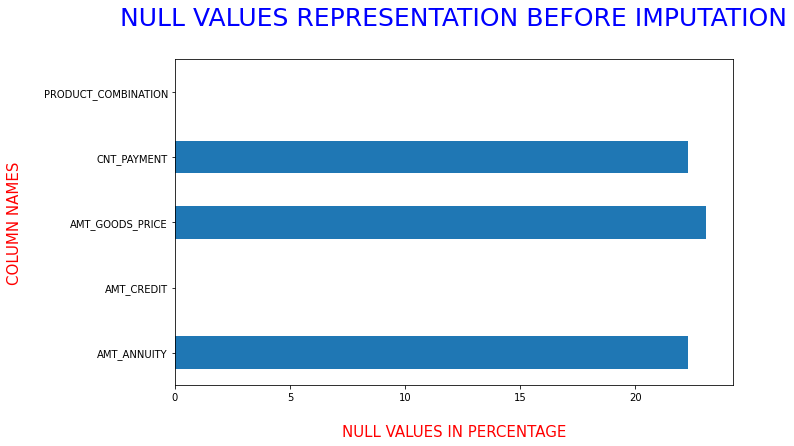

In [122]:
# Null values representation before imputing them
# From the below horizontal barplot, we can observe that AMT_GOODS_PRICE has the highest percentage of null values             

plt.figure(figsize = [10, 6])
nulls_more_than_0_less_than_40_previous_data[nulls_more_than_0_less_than_40_previous_data > 0].plot.barh()
plt.title('NULL VALUES REPRESENTATION BEFORE IMPUTATION\n', fontsize = 25, color = 'Blue')
plt.xlabel('\nNULL VALUES IN PERCENTAGE', fontsize = 15, color = 'red')
plt.ylabel('COLUMN NAMES\n', fontsize = 15, color = 'red')
plt.show()

## IMPUTING THE NULL / MISSING VALUES

In [123]:
# NAME_CONTRACT_TYPE column has 346 'XNA' values

bank_previous_application.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [124]:
# Imputing 346 'XNA' values in NAME_CONTRACT_TYPE column

name_contract_type_previous_data = bank_previous_application.NAME_CONTRACT_TYPE.mode()[0]
name_contract_type_previous_data

'Cash loans'

In [125]:
# Since 'Cash loans' is occurring most number of times (mode), we can impute the 'XNA' values with 'Cash loans'
# lambda function will check wherever there is an 'XNA' value and replace it with 'Cash loans'. If it's not an 'XNA', original value
# is retained. We can see that the count of 'Cash loans' has increased by 346

bank_previous_application.NAME_CONTRACT_TYPE = bank_previous_application.NAME_CONTRACT_TYPE.apply(lambda x : name_contract_type_previous_data if x == 'XNA' else x)
bank_previous_application.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747899
Consumer loans     729151
Revolving loans    193164
Name: NAME_CONTRACT_TYPE, dtype: int64

In [126]:
# NAME_CASH_LOAN_PURPOSE column has 922661 'XAP' values and 677918 'XNA' values

bank_previous_application.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [127]:
# Dropping them is the only solution because they are huge values

bank_previous_application = bank_previous_application.drop(bank_previous_application[bank_previous_application.NAME_CASH_LOAN_PURPOSE == 'XNA'].index)
bank_previous_application = bank_previous_application.drop(bank_previous_application[bank_previous_application.NAME_CASH_LOAN_PURPOSE == 'XAP'].index)
bank_previous_application.shape

(69635, 26)

In [128]:
# Imputing the null values in AMT_ANNUITY column in previous_application data set with median as median is uneffected by outliers

bank_previous_application.AMT_ANNUITY = bank_previous_application.AMT_ANNUITY.fillna(bank_previous_application.AMT_ANNUITY.median())

In [129]:
# Confirming the null value count in AMT_ANNUITY column

bank_previous_application.AMT_ANNUITY.isna().sum()

0

In [130]:
# Imputing the null values in AMT_CREDIT column in previous_application data set with median as median is uneffected by outliers

bank_previous_application.AMT_CREDIT = bank_previous_application.AMT_CREDIT.fillna(bank_previous_application.AMT_CREDIT.median())

In [131]:
# Confirming the null value count in AMT_CREDIT column

bank_previous_application.AMT_CREDIT.isna().sum()

0

In [132]:
# Imputing the null values in AMT_GOODS_PRICE column in previous_application data set with median as median is uneffected by outliers

bank_previous_application.AMT_GOODS_PRICE = bank_previous_application.AMT_GOODS_PRICE.fillna(bank_previous_application.AMT_GOODS_PRICE.median())

In [133]:
# Confirming the null value count in AMT_GOODS_PRICE column

bank_previous_application.AMT_GOODS_PRICE.isna().sum()

0

In [134]:
# Imputing the null values in CNT_PAYMENT column in previous_application data set with median as median is uneffected by outliers

bank_previous_application.CNT_PAYMENT = bank_previous_application.CNT_PAYMENT.fillna(bank_previous_application.CNT_PAYMENT.median())

In [135]:
# Confirming the null value count in CNT_PAYMENT column

bank_previous_application.CNT_PAYMENT.isna().sum()

0

In [136]:
# Imputing the null values in PRODUCT_COMBINATION column in previous_application data set with mode as it is a categorical variable

bank_previous_application.PRODUCT_COMBINATION = bank_previous_application.PRODUCT_COMBINATION.fillna(bank_previous_application.CNT_PAYMENT.mode())

In [137]:
# Confirming the null value count in PRODUCT_COMBINATION column

bank_previous_application.PRODUCT_COMBINATION.isna().sum()

0

In [138]:
# Verifying that all the columns have no null values

bank_previous_application.isna().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

# Merging the Data sets

In [139]:
# Merging the application_data data set with previous_application data set

merged_df = pd.merge(left = bank_application_data, right = bank_previous_application, how = 'inner', on = 'SK_ID_CURR', suffixes='_x')

In [140]:
# Displaying the first five rows of the merged dataframe

merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,...,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,...,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,low_normal,Cash Street: low


In [141]:
# Renaming the column names after merging the data

rename_merged_df = merged_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [142]:
# Removing unnecessary columns for analysis of merged dataframe

rename_merged_df.drop(['SK_ID_CURR', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'WEEKDAY_APPR_PROCESS_START_PREV',
                       'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY'], axis=1, inplace=True)

### Univariate analysis on merged data set

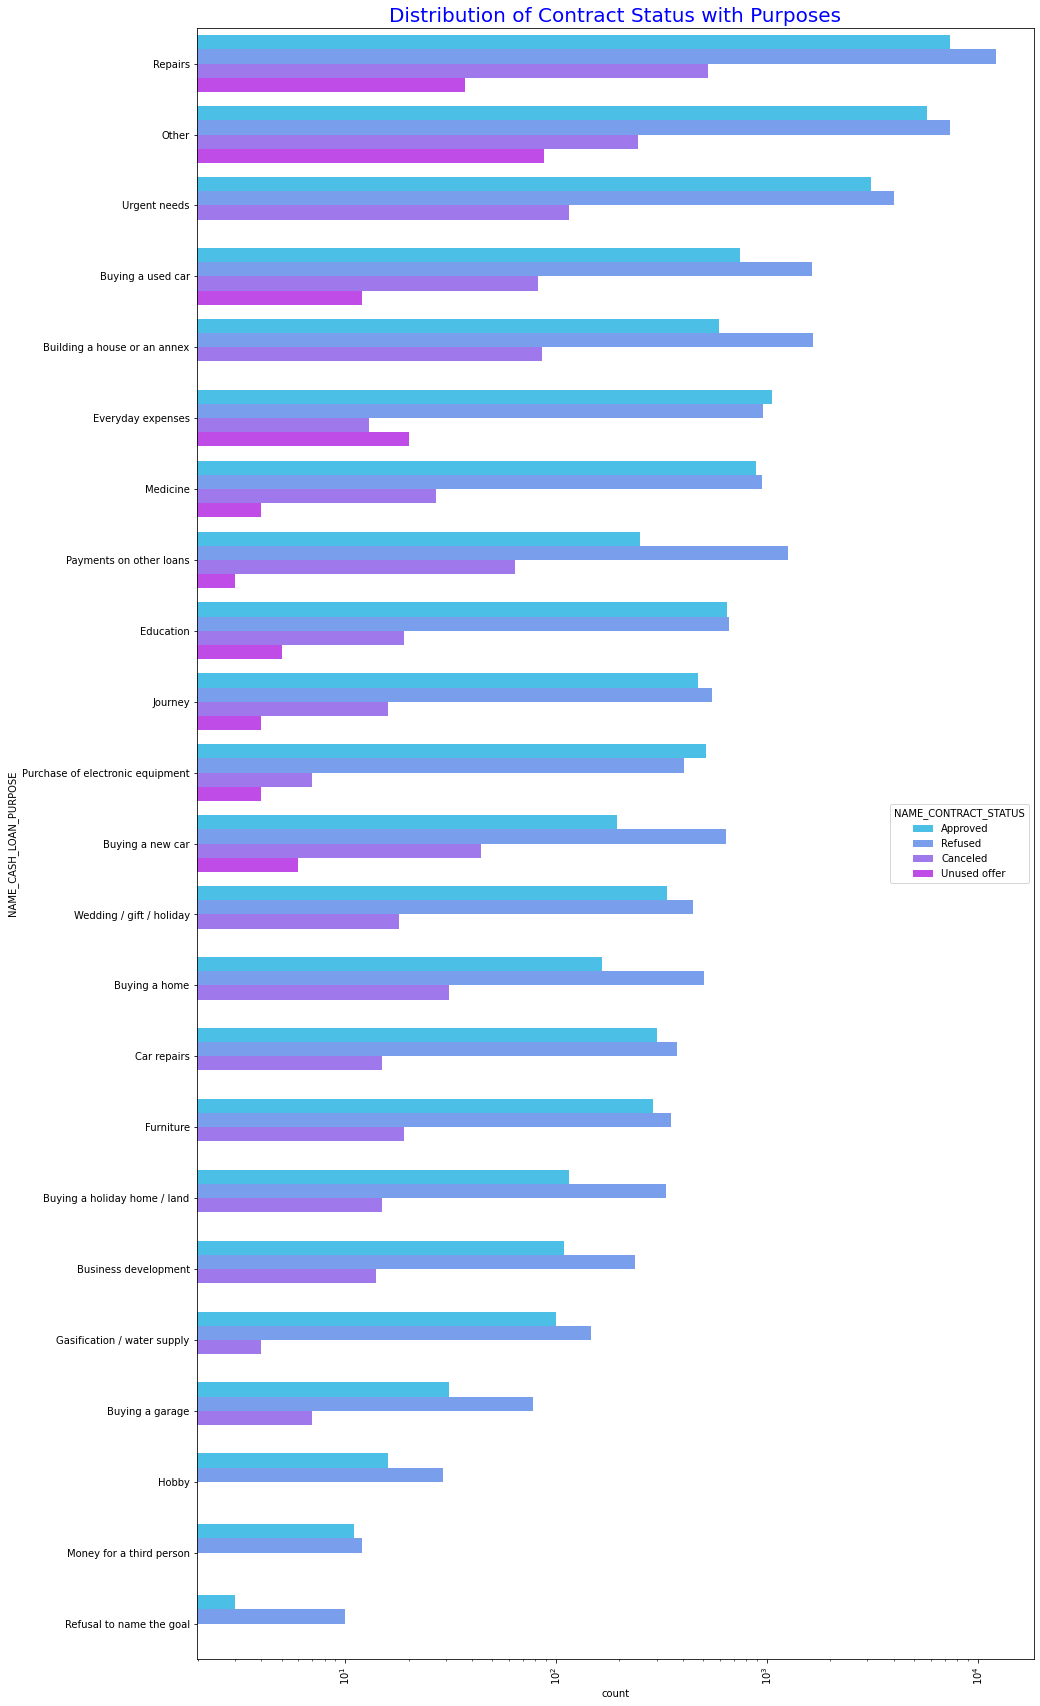

In [143]:
# Distribution of Cash Loans Vs Contract Purpose

plt.figure(figsize = [15, 30])
plt.xticks(rotation = 90)
plt.xscale('log')
plt.title('Distribution of Contract Status with Purposes', color = 'blue', fontsize = 20)
ax = sns.countplot(data = rename_merged_df, y= 'NAME_CASH_LOAN_PURPOSE', order = rename_merged_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index, hue = 'NAME_CONTRACT_STATUS', palette = 'cool')

**INFERENCES**

1. Repairs are dealing with more difficulties with payments on time. Most rejection of loans came from 'repairs' purpose.
2. Buying a garage, Business development, Buying land, Buying a new car and Education having basically higher loan payment.
3. For education purposes, we have equal number of approvals and rejection.
4. Paying other loans and buying a new car is having significant higher rejections than approvals.

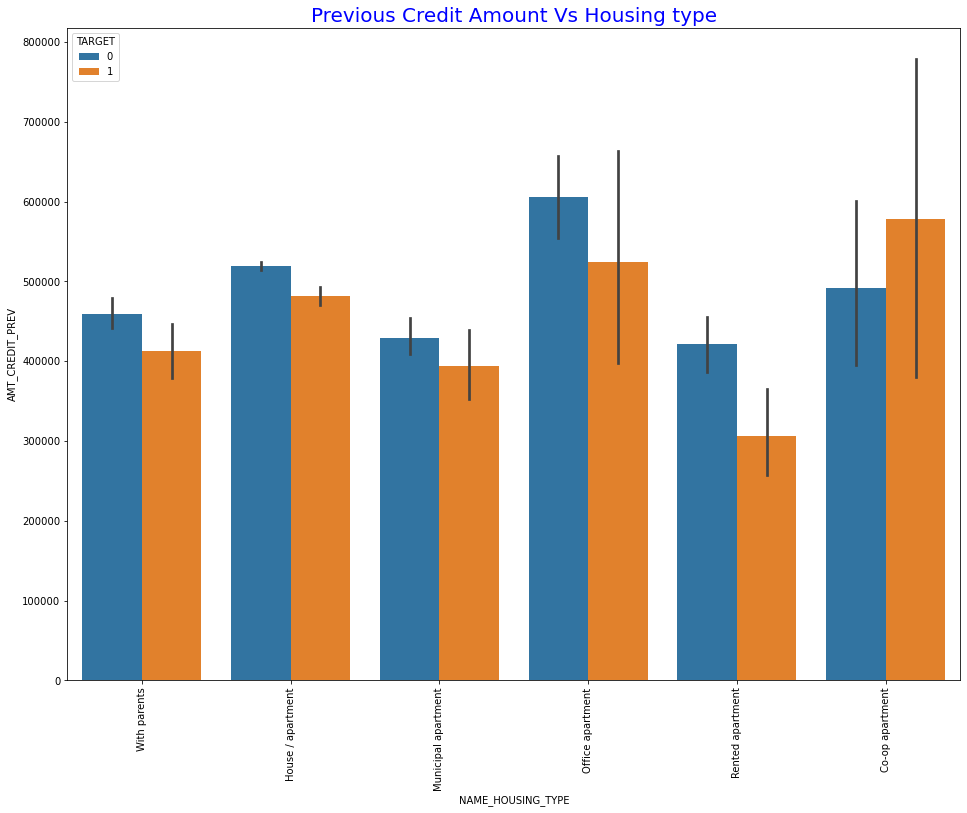

In [144]:
# Bar plotting for previous AMT_CREDIT_PREV Vs NAME_HOUSING_TYPE

plt.figure(figsize = [16, 12])
plt.xticks(rotation = 90)
sns.barplot(data = rename_merged_df, y = 'AMT_CREDIT_PREV', hue = 'TARGET', x = 'NAME_HOUSING_TYPE')
plt.title('Previous Credit Amount Vs Housing type', color = 'blue', fontsize = 20)
plt.show()

**INFERENCES**

1. Office apartment is having higher credit of non-defaulters and co-op apartment is having higher credit of defaulters. 
2. Bank can focus mostly on housing type categories like ‘with parents’ or ‘house/apartment’ or municipal apartment for successful payments.

### Bivariate analysis on merged data set

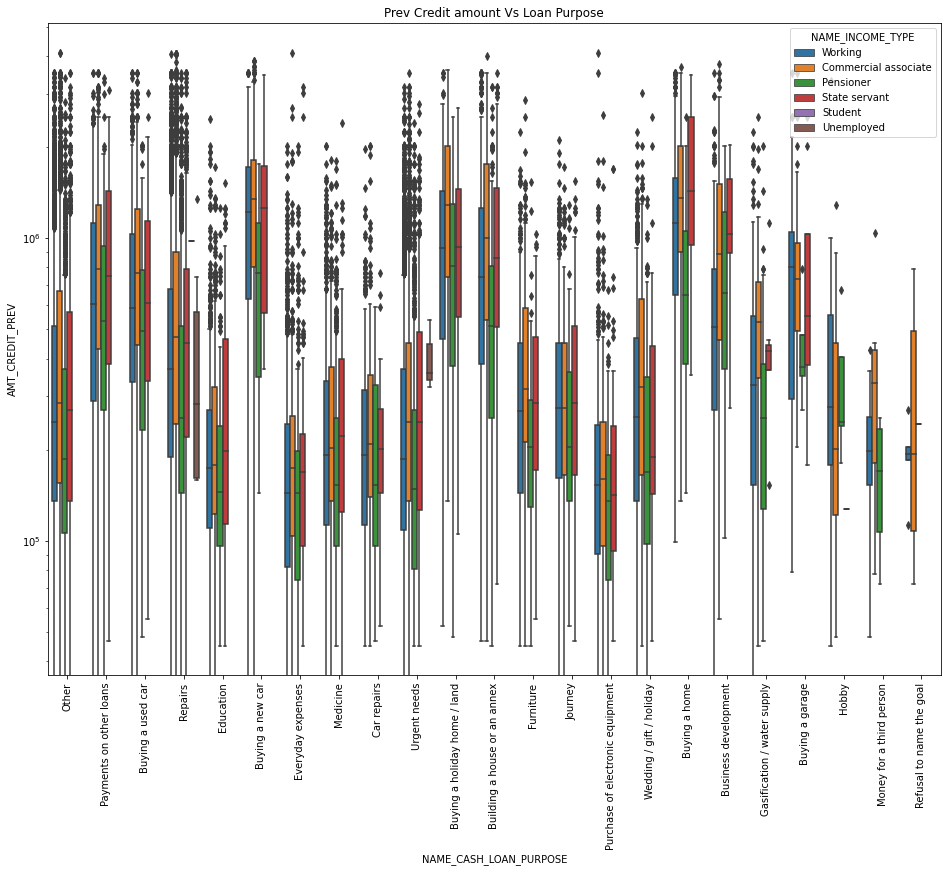

In [145]:
# Box plotting for AMT_CREDIT_PREV in logarithmic scale

plt.figure(figsize = [16, 12])
plt.xticks(rotation = 90)
plt.yscale('log')
sns.boxplot(data = rename_merged_df, x = 'NAME_CASH_LOAN_PURPOSE', hue = 'NAME_INCOME_TYPE', y = 'AMT_CREDIT_PREV', orient = 'v')
plt.title('Prev Credit amount Vs Loan Purpose')
plt.show()

**INFERENCES**

1. The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and 'Building a house' is higher.
2. Income type of state servants has a significant amount of credit applied.
3. Money for third person or a Hobby is having less credits applied.

# CONCLUSION

1. Banks should focus more on contract type 'Student', 'Pensioner' and 'Businessman' with housing type rather than 'Co-op          apartment' for successful payments as 'Co-op apartment' has difficulties in paying the loan.

2. Banks should focus less on income type 'Working' as they are having most number of unsuccessful payments.

3. Also, loan purpose 'Repair' is having highest number of unsuccessful payments on time.

4. Banks should focus on as much clients from housing type 'With parents' as possible as they are having least number of            unsuccessful payments.